# Iniaciación del Entorno de Trabajo

In [ ]:
# Descargar e instalar el modelo de lenguaje en inglés de SpaCy
!python -m spacy download en_core_web_lg

In [ ]:
# Conectar entorno a Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# Cargar libreria de lenguaje
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Instalar paquetes en Python
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install nltk
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install vaderSentiment
    !pip install datatable

In [ ]:
# Importar bibliotecas Python necesarias para realizar el análisis

#Base and Cleaning
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
import pandas as pd
from collections import Counter
from random import seed

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pyLDAvis
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import nltk
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Importar Dataset para Analisis

In [ ]:
# Caragar el Dataset
%cd /content/drive/MyDrive/
df_all = pd.read_csv('df_all.csv', sep=';')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/content/drive/MyDrive


In [ ]:
# Eliminar todos los registros vacíos o N/A
df_all.replace('', np.nan, inplace=True)
df_all.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Comprobar la longitud del dataset una vez eliminados los registros vacíos
len(df_all)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


90740

# Pre-Procesamiento

In [ ]:
# Definir STOPWORDS en INGLES
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Añadir STOPWORDS aplicadas especificamente al presente analisis
stop_words.extend(['not','chatgpt','gpt','chat','post','twitter','tweet','generative','trained','pre','transformer','chatbot', 'amp','hey','zftw','shi','tsuka','tyrant','woof','volt','nowai','imgnai','cai','evoai'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Definir funcion: LEMATIZACION Y eliminar STOPWORDS
def lemma_words(text):
    lemmas = [] #Lista para almacenar lemas
    doc= nlp(text) #Procesamiento de texto con el modelo de spaCy
    for token in doc:
      #Verificar si el token no es una stopword, un signo de puntuacion o un pronombre
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_) # Agregar el lema del token a la lista de lemas
    lemmas= [i for i in lemmas if len(i) > 1] # Filtrar lemas con longitud mayor a 1
    lemmas=[word for word in lemmas if word not in stop_words] # Eliminar stopwords de la lista de lemas
    lemmas=' '.join(lemmas)  # Convertir la lista de lemas a una cadena de texto
    return lemmas # Devolver la cadena de texto con los lemas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Aplicar la funcion al corpus
df_all['lemmas'] = df_all['cleaned_text'].apply(lemma_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Exportar dataset con los lemmas encontrados
# Este dataset sera utilizado posteriormente para realizar sobre el el pre-procesamiento especifico para el analisis de sentimientos
df_all.to_csv('ChatGPT_Analysis_Lemmas.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Eliminar filas con valores faltantes y filas duplicadas
df_all.dropna(inplace=True)
df_all = df_all.drop_duplicates(subset='lemmas', keep="first")
len(df_all)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


80219

In [ ]:
# Exportar LEMMAS
df_all['lemmas'].to_csv('Lemmas_ChatGPT.csv')
# Exportar DATASET completo
df_all.to_csv('ChatGPT_Analysis.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# WordCloud

In [ ]:
# Definir funcion para graficar WordCloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 7)) #Fijar el tamaño de la figura
    plt.imshow(wordcloud) # Display imagen
    plt.axis("off"); # Eliminar los detalles de los ejes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generar WrodCloud a partir de la funcion definida y los lemas identificados
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(' '.join(df_all['lemmas']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


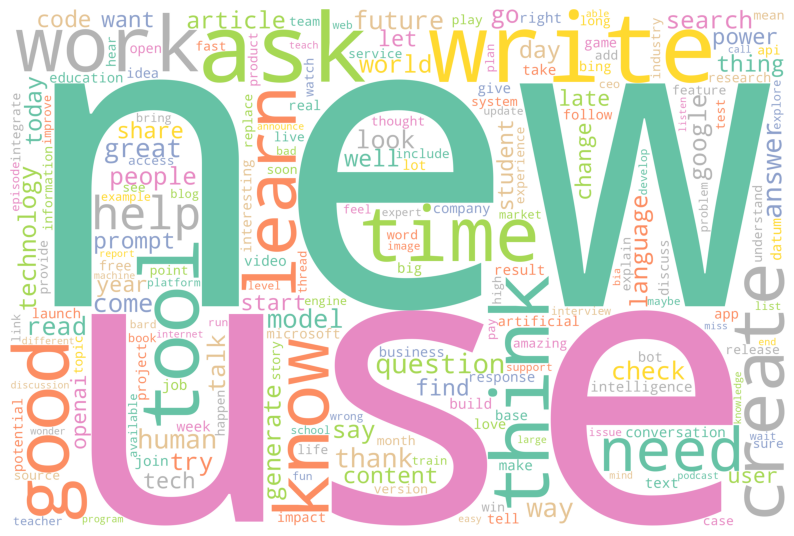

In [ ]:
# Graficar
plot_cloud(wordcloud)

# Analisis de N-Gramas: Unigramas, Bigramas, Trigramas

In [ ]:
dft= df_all['lemmas'] # Obtener la columna 'lemmas' del DataFrame
dft = [x for x in dft if str(x) != 'nan'] # Filtrar valores NaN de la lista
print(dft)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Unigramas

In [ ]:
# Inicializar el vectorizador TF-IDF
tfIdfVectorizer=TfidfVectorizer(use_idf=True, ngram_range=(1,1))
tfIdf = tfIdfVectorizer.fit_transform(dft) # Calcular la matriz TF-IDF
names=tfIdfVectorizer.get_feature_names_out() # Obtener los nombres de los tokens
freqs = tfIdf.sum(axis=0).A1 # Calcular las frecuencias de términos
result= dict(zip(names, freqs)) # Crear un diccionario que mapea los nombres de las características a sus frecuencias TF-IDF
print(result)

In [ ]:
# Obtener las primeras 30 palabras más relevantes en el TF-IDF
from operator import itemgetter
i = 0 # Contador para limitar la salida a 30 palabras
results_sorted=sorted(result.items(), key = itemgetter(1), reverse = True) # Ordenar el resultado del TF-IDF en orden descendente
# Iterar sobre las palabras ordenadas
for key, value in results_sorted:
    i += 1
    if i == 31: # Detener la iteración después de imprimir las primeras 30 palabras
      break
    # Imprimir la palabra y su valor TF-IDF
    print(key, value)

like 1139.2277681345624
ask 1119.556692185185
use 1118.688532254541
write 1102.3263546903
new 1019.6581413441932
think 848.6529348167277
tool 811.7360220702213
good 799.5107792140509
know 779.3452719110257
work 760.526218440475
time 705.1063273433357
thank 681.3714692474553
answer 660.2581634227415
create 657.3396799305895
learn 651.330286688404
need 645.0603044193521
question 641.2404152434527
help 633.3198688017255
great 630.7376671193092
way 602.9528842410797
future 592.2823491911713
human 578.8413492093345
come 578.7678580974774
check 572.0685112612649
read 570.5610379805363
look 570.02545731701
google 547.5765053888301
try 546.4922453136516
go 542.0518564948151
talk 535.8813166017726


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Unigramas más relevantes del corpus')

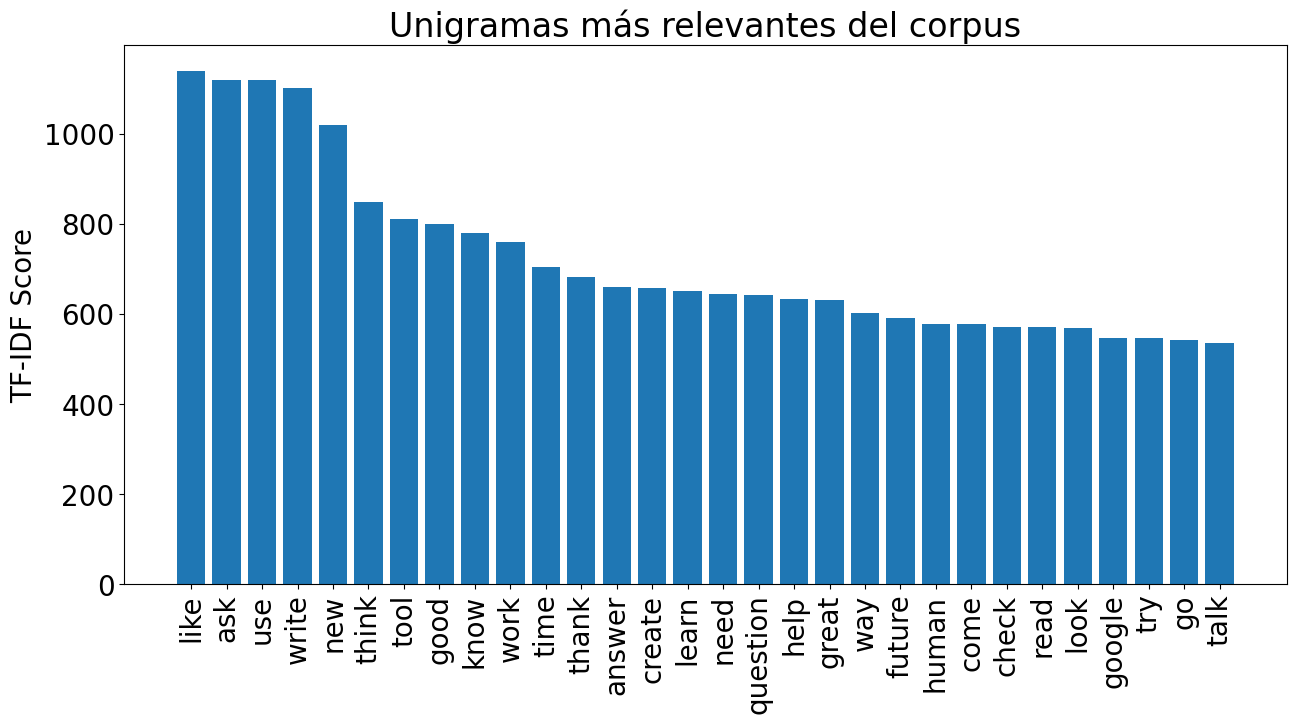

In [ ]:
# Graficar los unigramas más relevantes
df_results = pd.DataFrame.from_dict(results_sorted).head(30) # Convertir los resultados ordenados a un DataFrame
plt.rcParams.update({'font.size': 20}) # Configurar el tamaño de la fuente
plt.figure(figsize=(15, 7)) # Crear la figura
plt.bar(df_results[0], df_results[1])# Graficar el gráfico de barras
plt.xticks(rotation=90)# Rotar etiquetas del eje x

# Etiquetar ejes
plt.ylabel('Puntuación TF-IDF')
plt.title('Unigramas más relevantes del corpus')

## Bigramas

In [ ]:
# Inicializar el vectorizador TF-IDF para bigramas
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft) # Calcular la matriz TF-IDF para bigramas
names_bi=tfIdfVectorizer_bi.get_feature_names_out() # Obtener los nombres de los bigramas
freqs_bi = tfIdf_bi.sum(axis=0).A1 # Calcular las frecuencias de términos para bigramas
result_bi= dict(zip(names_bi, freqs_bi)) # Crear un diccionario que mapea los nombres de las características (bigramas) a sus frecuencias TF-IDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Obtener los primeros 30 brigramas más relevantes en el TF-IDF
from operator import itemgetter
i = 0 # Contador para limitar la salida a 30 palabras
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True) # Ordenar el resultado del TF-IDF en orden descendente
# Iterar sobre las palabras ordenadas
for key, value in results_sorted:
    i += 1
    if i == 31: # Detener la iteración después de imprimir las primeras 30 palabras
      break
    # Imprimir la palabra y su valor TF-IDF
    print(key, value)

artificial intelligence 210.0015949150538
language model 169.57354605479793
ask write 151.0865436751544
search engine 119.01428615208985
look like 114.5359944049888
ask question 87.74980764179564
tool like 82.85578381866314
use case 82.62446486953965
large language 74.5900153930395
answer question 72.88732580041294
look forward 65.98255637763748
game changer 65.6205379696787
sentiment result 61.23055187805068
write poem 57.551029119232865
need know 56.968616361687374
thank share 54.89257822336257
check late 53.152237837540554
natural language 49.7403104980348
elon musk 49.34636587245769
google search 47.72011935245412
open source 46.96231655247309
late article 46.4357805837846
way use 45.09049612449284
new tool 44.525379529868786
feel like 43.91205098531544
mind blow 40.4463560673907
sound like 40.299978550507525
let know 40.18106690896583
social medium 39.64329709085257
write code 37.538845374190686


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Bigramas más relevantes del corpus')

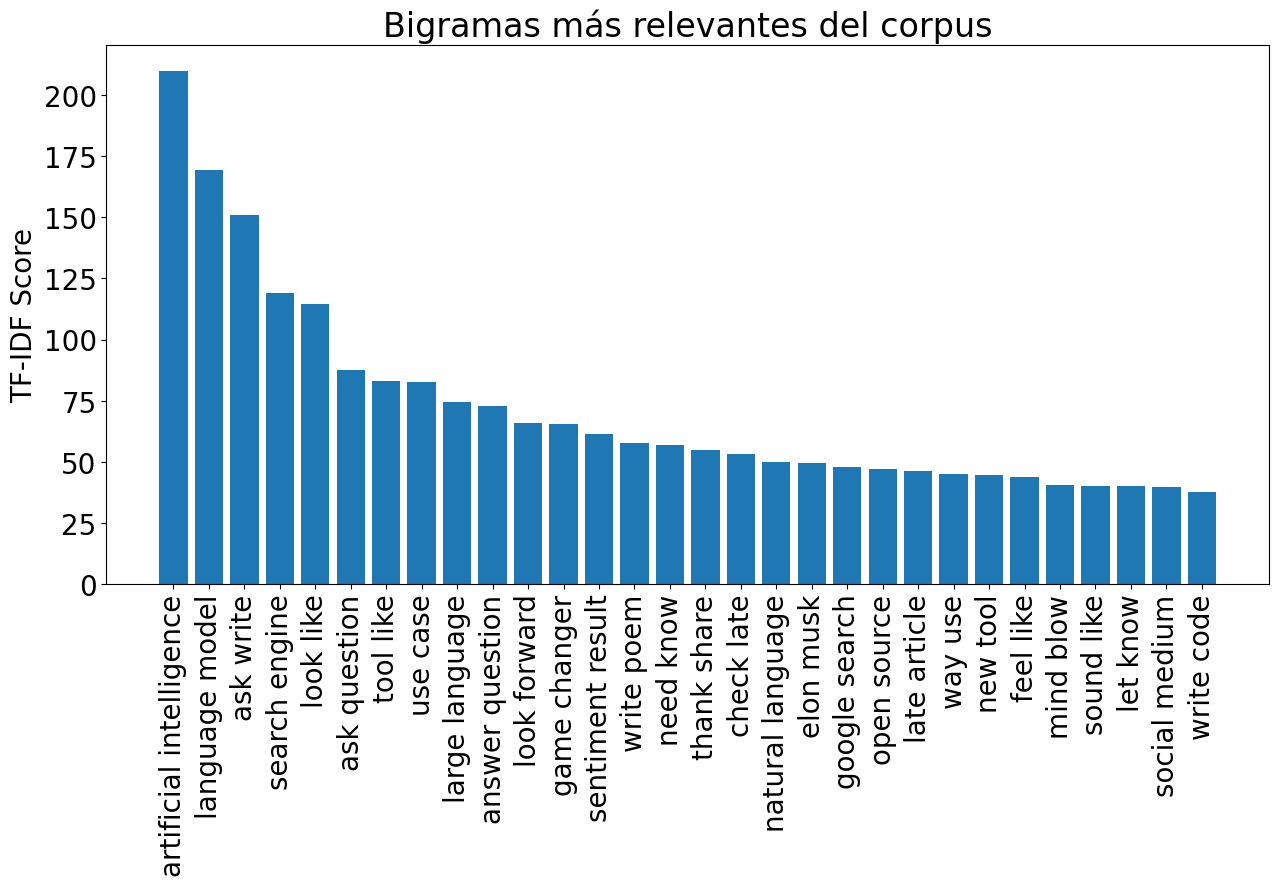

In [ ]:
# Ordenar los resultados de bigramas TF-IDF en orden descendente
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30) # Convertir los resultados ordenados a un DataFrame y seleccionar los primeros 30 bigramas
plt.rcParams.update({'font.size': 20}) # Configurar el tamaño de la fuente
plt.figure(figsize=(15,7)) #Crear la figura
plt.bar(df_results_bi[0],df_results_bi[1]) #Graficar el gráfico de barras
plt.xticks(rotation=90) #Rotación del eje X
#Etiquetar ejes
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del corpus')

## Trigramas

In [ ]:
# Inicializar el vectorizador TF-IDF para trigramas
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft) # Calcular la matriz TF-IDF para trigramas
names_tri= tfIdfVectorizer_tri.get_feature_names_out() # Obtener los nombres de los trigramas
freqs_tri = tfIdf_tri.sum(axis=0).A1 # Calcular las frecuencias de términos para trigramas
result_tri = dict(zip(names_tri, freqs_tri))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Obtener los primeros 30 trigramas más relevantes en el TF-IDF
from operator import itemgetter
i = 0 # Contador para limitar la salida a 30 palabras
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True) # Ordenar el resultado del TF-IDF en orden descendente
# Iterar sobre las palabras ordenadas
for key, value in results_sorted:
    i += 1
    if i == 31: # Detener la iteración después de imprimir las primeras 30 palabras
      break
    # Imprimir la palabra y su valor TF-IDF
    print(key, value)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


71.40119020893894
37.06515649514026
31.012496124509887
30.51312039080807
21.11871411681314
19.741865272524954
18.752056183076107
18.387364427011423
17.23857343572729
17.176788724097598
16.476653985469643
16.308513490685492
15.151779344567956
14.765531753165211
14.314914556455513
13.091472212947814
12.223832185046179
12.223832185046179
12.223832185046179
11.676232391991311
11.606508898767474
10.414987729634525
10.380511153032192
10.222727875460329
10.134694586036687
10.048771109989898
9.957946652592993
9.8689297501825
9.749304884104601
9.74381397622954


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Trigramas más relevantes del corpus')

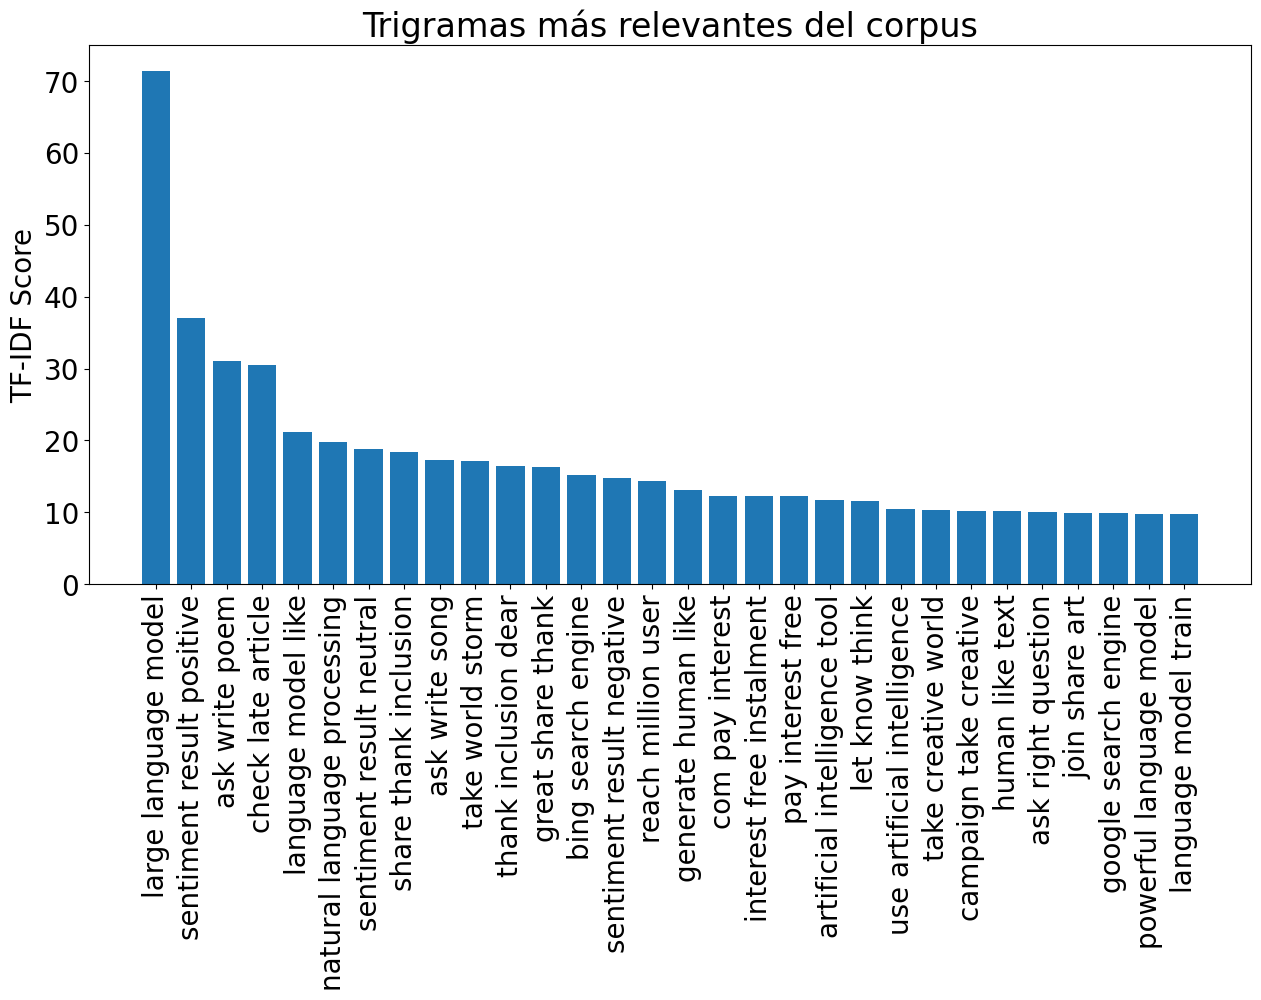

In [ ]:
# Ordenar los resultados de trigramas TF-IDF en orden descendente
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30) # Convertir los resultados ordenados a un DataFrame y seleccionar los primeros 30 trigramas
plt.rcParams.update({'font.size': 20}) # Configurar el tamaño de la fuente
plt.figure(figsize=(15,7)) #Crear la figura
plt.bar(df_results_tri[0],df_results_tri[1]) #Graficar el gráfico de barras
plt.xticks(rotation=90) #Rotación del eje X
#Etiquetar ejes
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del corpus')

# Modelado de Tópico

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
%cd /content/drive/MyDrive/
# Cargar el CSV que contiene la data lematizada y pre-procesada, lista para el Modelado de Topicos
df_topic = pd.read_csv('ChatGPT_Analysis.csv')
print(df_topic.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive
/content/drive/MyDrive
   Unnamed: 0                   id  \
0          14  1641212328900284418   
1          16  1641212198180511745   
2          19  1641212064705449985   
3          25  1641211666762178561   
4          28  1641211554476576770   

                                                text             user  \
0  You know what a good feature be in ChatGPT @Op...        a_hafez12   
1  Though it primarily targets companies like Tik...   crypto_talkies   
2  @techAU @elonmusk @TheChiefNerd Walt Disney tr...  SpiderMonkeyXYZ   
3  ChatGPT: Why we're still smarter than machines...    roxana_huaman   
4  @elonmusk @TheChiefNerd Policymakers are the w...   iamhilarry3090   

        fecha  retweet_number  like_number  \
0  2023-03-29             0.0          1.0   
1  2023-03-29             0.0          0.0   
2  2023-03-29             0.0          0.0   
3  2023-03-29             0.0          0.0   
4  2023-03-29             0.0          1.0   

      

In [ ]:
# Definir funcion que tokeniza el texto
def tokenize(text):
    text = str(text) # Convertir el texto a cadena
    tokens = text.split() # Dividir el texto en tokens
    return tokens

# Aplicar la funcion
df_topic['tokens'] = df_topic['lemmas'].apply(tokenize)
print(df_topic.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Unnamed: 0                   id  \
0          14  1641212328900284418   
1          16  1641212198180511745   
2          19  1641212064705449985   
3          25  1641211666762178561   
4          28  1641211554476576770   

                                                text             user  \
0  You know what a good feature be in ChatGPT @Op...        a_hafez12   
1  Though it primarily targets companies like Tik...   crypto_talkies   
2  @techAU @elonmusk @TheChiefNerd Walt Disney tr...  SpiderMonkeyXYZ   
3  ChatGPT: Why we're still smarter than machines...    roxana_huaman   
4  @elonmusk @TheChiefNerd Policymakers are the w...   iamhilarry3090   

        fecha  retweet_number  like_number  \
0  2023-03-29             0.0          1.0   
1  2023-03-29             0.0          0.0   
2  2023-03-29             0.0          0.0   
3  2023-03-29             0.0          0.0   
4  2023-03-29             0.0          1.0   

                                            hashtags  \

In [ ]:
# Importar semilla
seed(24)
# Crear diccionario de palabras para el modelado de topicos
id2word = Dictionary(df_topic['tokens'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filtrar los extremos (2% y 95%)
id2word.filter_extremes(no_below=2, no_above=.95)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear un objeto para el corpus
corpus = [id2word.doc2bow(d) for d in df_topic['tokens']]
# Recorremos cada lista de tokens en la columna 'tokens' del DataFrame df_topic
# Aplicamos id2word.doc2bow para convertir cada lista de tokens en una representación de bolsa de palabras (BoW)
# El resultado es una lista de tuplas donde cada tupla contiene el ID de la palabra y su frecuencia en el documento

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Definir funcion para encontrar el numero optimo de topicos (k)
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the
    LDA model with respective number of topics
    """
     # Inicializar listas para almacenar modelos de temas LDA y valores de coherencia
    coherence_values_topic = []
    model_list_topic = []
    # Iterar sobre diferentes números de temas
    for num_topics in range(start, limit, step):
        # Entrenar el modelo LDA
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5)
        # Agregar el modelo a la lista de modelos
        model_list_topic.append(model)
        # Calcular el valor de coherencia c_v para el modelo
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    # Devolver la lista de modelos y los valores de coherencia
    return model_list_topic, coherence_values_topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Aplicar la funcion definida
model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus, # Corpus Gensim que contiene representaciones de bolsa de palabras de los documentos
                                                        texts=df_topic['tokens'], # Lista de textos de entrada (lista de listas de tokens)
                                                        start=2, limit=13, step=1) # Computar de 2 a 12 temas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Obtener los valores del score de coherencia como un DataFrame
coherence_values_topic_df = pd.DataFrame(coherence_values_topic)

# Guardar los datos como CSV
coherence_values_topic_df.to_csv('coherence_values.csv', index=False)

# En caso de querer cargar datos pre-calculados
# coherence_values_topic_df = pd.read_csv('coherence_values.csv', index_col=False)

# Imprimir el DataFrame
coherence_values_topic_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,0.391651
1,0.381712
2,0.443584
3,0.474261
4,0.446219
5,0.423135
6,0.468149
7,0.437605
8,0.432732
9,0.458439


In [ ]:
# Extraer los valores de la primera columna como una lista
coherence_values_topic_df=coherence_values_topic_df.iloc[:, 0].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Indice de coherencia')

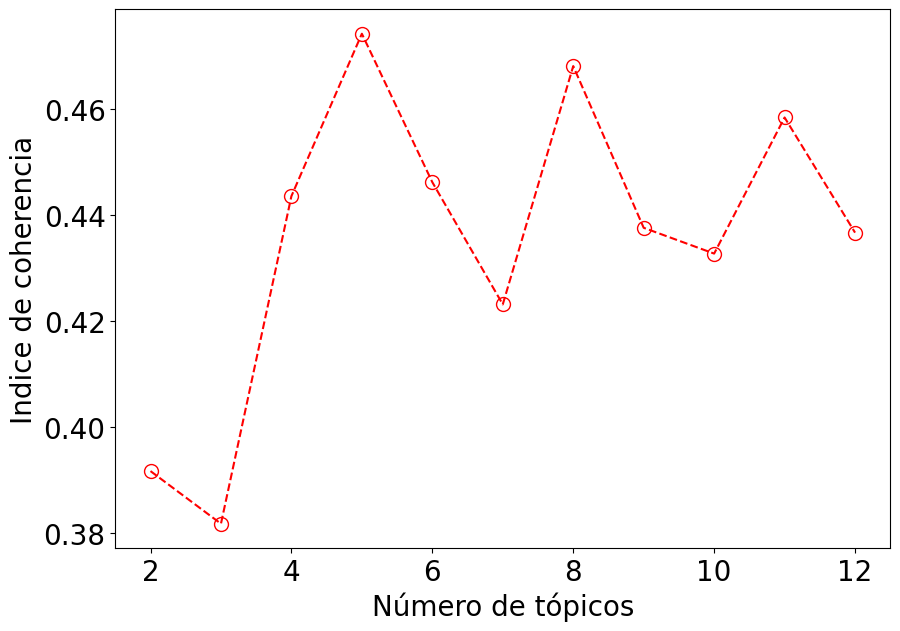

In [ ]:
import matplotlib.path as mpath
# Crear una figura
plt.figure(figsize=(10,7))
# Definir un marcador personalizado en forma de estrella
estrella = mpath.Path.unit_regular_star(6)
circulo = mpath.Path.unit_circle()
verts = np.concatenate([circulo.vertices, estrella.vertices[::-1, ...]])
codes = np.concatenate([circulo.codes, estrella.codes])
cut_star = mpath.Path(verts, codes)
# Graficar los valores de coherencia en función del número de temas, en este caso de 2 a 12
plt.plot([2,3,4,5,6,7,8,9,10,11,12],coherence_values_topic_df, '--r', marker="o", markersize=10, fillstyle='none')
# Cambiar las siguientes dos lineas, en funcion del numero de topicos que se desee destacar con la estrella
#plt.axvline(x=6, color='b', linestyle='--')
#plt.plot(6, 0.477435 , '--r', marker=cut_star, markersize=18)
# Etiquetar ejes
plt.xlabel('Número de tópicos')
plt.ylabel('Indice de coherencia')


## Modelo k=6

In [ ]:
# Calcular el modelo para k=6
k=6
# Modelo LDA
model_k6 = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=k,
                                        passes=5,
                                        random_state= 12)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Guardar el modelo y cargarlo si fuera necesario
model_k6.save("model6_topics.model")
model_k6_load=LdaMulticore.load("model6_topics.model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calcular de nuevo el nivel de coherencia para el numero k seleccionado
coherence_model_k6 = CoherenceModel(model=model_k6_load, texts=df_topic['tokens'],
                                   dictionary=id2word, coherence='c_v')
coherence_model_k6 = coherence_model_k6.get_coherence()
print('\nCoherence Score: ', coherence_model_k6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4496715742781923


In [ ]:
# Imprimir la keyword de cada topico
print(model_k6_load.print_topics())
doc_lda = model_k6_load[corpus]
# Filtrador de palabras
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_k6_load.print_topics()]
# Crear topicos
topics = [' '.join(t[0:10]) for t in words]
# Imprimir los topicos
for id, t in enumerate(topics):
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

[(0, '0.034*"search" + 0.028*"google" + 0.026*"model" + 0.022*"language" + 0.016*"intelligence" + 0.014*"artificial" + 0.013*"microsoft" + 0.013*"engine" + 0.011*"bing" + 0.009*"openai"'), (1, '0.022*"talk" + 0.014*"thank" + 0.013*"article" + 0.013*"great" + 0.012*"read" + 0.012*"future" + 0.011*"new" + 0.010*"share" + 0.010*"interesting" + 0.010*"education"'), (2, '0.022*"new" + 0.014*"power" + 0.012*"game" + 0.010*"technology" + 0.009*"app" + 0.009*"tool" + 0.009*"product" + 0.008*"business" + 0.008*"use" + 0.008*"world"'), (3, '0.028*"use" + 0.028*"write" + 0.018*"tool" + 0.015*"help" + 0.014*"create" + 0.013*"like" + 0.013*"student" + 0.012*"learn" + 0.011*"content" + 0.011*"generate"'), (4, '0.011*"ask" + 0.011*"problem" + 0.011*"answer" + 0.009*"wrong" + 0.009*"like" + 0.008*"need" + 0.008*"think" + 0.008*"know" + 0.008*"information" + 0.007*"datum"'), (5, '0.027*"ask" + 0.016*"think" + 0.013*"good" + 0.013*"question" + 0.012*"know" + 0.011*"go" + 0.011*"write" + 0.011*"people" +

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mostrar el mapa intertopico para el numero de k seleccionado
pyLDAvis.enable_notebook()
gensimvis.prepare(model_k6_load, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.108431 -0.128363       1        1  21.803716
5      0.162890 -0.002721       2        1  18.961149
2     -0.164562 -0.042540       3        1  17.368177
1     -0.173607 -0.202305       4        1  15.911419
4      0.214934  0.076880       5        1  13.318353
0     -0.148085  0.299049       6        1  12.637185, topic_info=         Term         Freq        Total Category  logprob  loglift
338    search  3337.000000  3337.000000  Default  30.0000  30.0000
62      write  6678.000000  6678.000000  Default  29.0000  29.0000
334    google  2792.000000  2792.000000  Default  28.0000  28.0000
14        use  5964.000000  5964.000000  Default  27.0000  27.0000
699     model  2573.000000  2573.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
194     human   532.589133  2800.308361   Topic6  -5.2233   0.4088
147    answer   487.966903  3754.421349   Topic6  -5.3108   0.0281
74        say   442.436741  2343.663633   Topic6  -5.4087   0.4014
153  question   440.129844  3353.822408   Topic6  -5.4140   0.0377
88       tech   386.559893  1997.324069   Topic6  -5.5437   0.4262

[408 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1761      2  0.024620    access
1761      3  0.662102    access
1761      5  0.210149    access
1761      6  0.101997    access
397       6  0.995933  activity
...     ...       ...       ...
106       1  0.010153      year
106       2  0.506389      year
106       3  0.307979      year
106       4  0.075303      year
106       6  0.099839      year

[736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 3, 2, 5, 1])

In [ ]:
# Generar la visualización interactiva con pyLDAvis
vis_data = gensimvis.prepare(model_k6_load, corpus, id2word)

# Crear una figura de matplotlib y mostrar la visualización
plt.figure(figsize=(10, 7))
pyLDAvis.display(vis_data)

# Guardar la figura como un archivo de imagen
plt.savefig('visualizacion_lda.jpg', format='jpg')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1000x700 with 0 Axes>

In [ ]:
# Definir funcion LDA
def document_to_lda_features(model_k6_load,document):
  topic_importance=np.array(model_k6_load.get_document_topics(document, minimum_probability=0))  # Obtener la importancia de los temas para el documento
  return topic_importance[:,1]  # Devolver solo las probabilidades de los temas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear una nueva columna 'lda_features' en el DataFrame df_topic
# Usar la función document_to_lda_features para calcular las características LDA para cada documento en el corpus
df_topic['lda_features'] = list(map(lambda doc: document_to_lda_features(model_k6_load, doc), corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Se tokenizan los datos
def topic_important(item_score):
    # Se devuelve el índice del tema con la puntuación más alta
    score = np.argmax(item_score, axis=0)
    return score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear una nueva columna 'topic_dominant' en el DataFrame df_topic
# Aplicar la función topic_important para obtener el tema dominante para cada documento
df_topic['topic_dominant'] = df_topic['lda_features'].apply(topic_important)
df_topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,text,user,fecha,retweet_number,like_number,hashtags,mentions,month,day,idioma,longitud,dia_semana,cleaned_text,lemmas,tokens,lda_features,topic_dominant
0,14,1641212328900284418,You know what a good feature be in ChatGPT @Op...,a_hafez12,2023-03-29,0.0,1.0,"#AI, #ChatGPT",@OpenAI,3,29,english,282,Wednesday,know good feature chatgpt sharing link convers...,know good feature share link conversation make...,"[know, good, feature, share, link, conversatio...","[0.008414837531745434, 0.10504456609487534, 0....",3
1,16,1641212198180511745,Though it primarily targets companies like Tik...,crypto_talkies,2023-03-29,0.0,0.0,"#BTC, #Bitcoin, #CryptoNews, #cryptomarket, #C...",@crypto_talkies,3,29,english,255,Wednesday,though primarily targets companies like tik to...,primarily target company like tik tok bill lan...,"[primarily, target, company, like, tik, tok, b...","[0.17355388402938843, 0.009844264015555382, 0....",4
2,19,1641212064705449985,@techAU @elonmusk @TheChiefNerd Walt Disney tr...,SpiderMonkeyXYZ,2023-03-29,0.0,0.0,"#ChatGPT, #AGI","@techAU, @elonmusk, @TheChiefNerd",3,29,english,101,Wednesday,walt disney tried warn,walt disney try warn,"[walt, disney, try, warn]","[0.034991346299648285, 0.03481541946530342, 0....",3
3,25,1641211666762178561,ChatGPT: Why we're still smarter than machines...,roxana_huaman,2023-03-29,0.0,0.0,"#ChatGPT, #AI",@BBC_Reel,3,29,scots,97,Wednesday,chatgpt still smarter machines via,smart machine,"[smart, machine]","[0.7208870053291321, 0.05562056973576546, 0.05...",0
4,28,1641211554476576770,@elonmusk @TheChiefNerd Policymakers are the w...,iamhilarry3090,2023-03-29,0.0,1.0,"#ai, #chatgpt","@elonmusk, @TheChiefNerd",3,29,english,162,Wednesday,policymakers worst people develop safety proto...,policymaker bad people develop safety protocol...,"[policymaker, bad, people, develop, safety, pr...","[0.014166801236569881, 0.0985531285405159, 0.1...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80214,459668,1610539337845989376,@warrbo @RadioFreeTom #ChatGPT doesn't think: ...,marioPS,2023-01-04,0.0,1.0,#ChatGPT,"@warrbo, @RadioFreeTom",1,4,english,306,Wednesday,doesn think magnificently aggregates opinions ...,think magnificently aggregate opinion quantify...,"[think, magnificently, aggregate, opinion, qua...","[0.26881763339042664, 0.008346308022737503, 0....",4
80215,459669,1610539226734694400,Twitter should add #ChatGPT as a native featur...,Helghardt,2023-01-04,0.0,1.0,#ChatGPT,@elonmusk,1,4,english,252,Wednesday,twitter add native feature can read people say...,add native feature read people deeply ask ques...,"[add, native, feature, read, people, deeply, a...","[0.3459577262401581, 0.011181432753801346, 0.0...",3
80216,459686,1610537666734333952,Is there any reason for that ? #chatGPT @gptne...,Royi_Namir,2023-01-04,1.0,2.0,#chatGPT,@gptnews1,1,4,english,96,Wednesday,reason completely wrong,reason completely wrong,"[reason, completely, wrong]","[0.04174025356769562, 0.041670553386211395, 0....",4
80217,459694,1610536038094757888,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,Pup_In_Cup,2023-01-04,0.0,1.0,"#LAMDA, #ChatGPT","@GoogleAI, @OpenAI, @Marktechpost",1,4,english,277,Wednesday,versus cares lamda isn available chatgpt reaso...,versus care lamda available reason interested ...,"[versus, care, lamda, available, reason, inter...","[0.00982340145856142, 0.009853296913206577, 0....",5


In [ ]:
# Se genera un csv con los resultados del MODELADO DE TOPICOS
df_topic.to_csv('topic_model_results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Se saca el número de tweets por tópico
df_topic["topic_dominant"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic_dominant
3    18908
5    17720
2    13429
1    12747
4     9324
0     8091
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


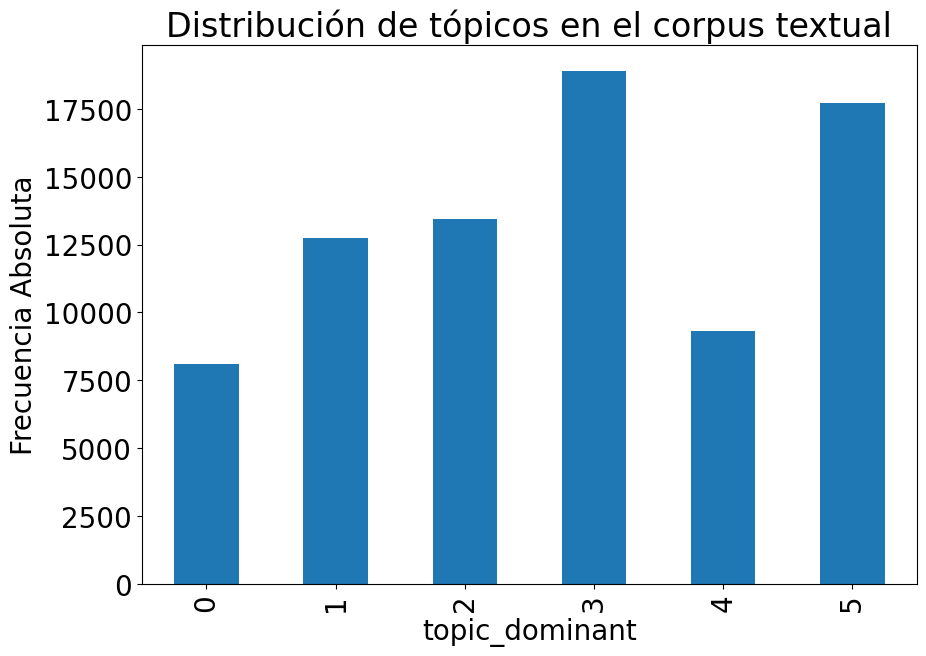

In [ ]:
# Se saca el número de tweets por tópico
df_topic["topic_dominant"].value_counts()

# Se dibuja esa distribución
plt.figure(figsize=(10,7))
ax=df_topic["topic_dominant"].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de tópicos en el corpus textual')
plt.show()

In [ ]:
# Imprimir los temas del modelo cargado model_k6_load
model_k6_load.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.034*"search" + 0.028*"google" + 0.026*"model" + 0.022*"language" + 0.016*"intelligence" + 0.014*"microsoft" + 0.014*"artificial" + 0.013*"engine" + 0.011*"bing" + 0.011*"openai"'),
 (1,
  '0.022*"talk" + 0.013*"thank" + 0.013*"article" + 0.012*"great" + 0.012*"read" + 0.012*"future" + 0.010*"new" + 0.010*"share" + 0.009*"late" + 0.009*"thought"'),
 (2,
  '0.022*"new" + 0.014*"power" + 0.011*"technology" + 0.011*"game" + 0.009*"tool" + 0.009*"app" + 0.009*"business" + 0.009*"product" + 0.009*"use" + 0.008*"web"'),
 (3,
  '0.030*"write" + 0.028*"use" + 0.017*"tool" + 0.015*"help" + 0.014*"create" + 0.012*"student" + 0.012*"like" + 0.012*"learn" + 0.011*"content" + 0.011*"generate"'),
 (4,
  '0.012*"answer" + 0.012*"ask" + 0.011*"problem" + 0.009*"wrong" + 0.009*"datum" + 0.009*"information" + 0.008*"need" + 0.008*"like" + 0.008*"think" + 0.007*"know"'),
 (5,
  '0.025*"ask" + 0.016*"think" + 0.013*"good" + 0.013*"know" + 0.012*"like" + 0.012*"go" + 0.011*"question" + 0.011*"time

## Modelo k=4

In [ ]:
# Calcular el modelo para k=4
k = 4

# Modelo LDA
model_k4 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=k,
                                       passes=5,
                                       random_state=12)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Guardar el modelo calculado o cargar uno previamente calculado

# Guardar el modelo calculado para k=4
model_k4.save("model4_topics.model")

# Cargar el modelo guardado para k=4
model_k4_load = LdaMulticore.load("model4_topics.model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calcular la indice de coherenica
coherence_model_k4 = CoherenceModel(model=model_k4_load, texts=df_topic['tokens'],
                                   dictionary=id2word, coherence='c_v')
coherence_model_k4 = coherence_model_k4.get_coherence()
print('\nCoherence Score: ', coherence_model_k4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.46552338292428336


In [ ]:
# Imprimir las palabras clave de cada tema
print(model_k4_load.print_topics())
# Obtener la distribución de temas para cada documento
doc_lda = model_k4_load[corpus]
# Filtrar palabras clave
words = [re.findall(r'"([^"]*)"', t[1]) for t in model_k4_load.print_topics()]
# Crear los temas
topics = [' '.join(t[0:10]) for t in words]
# Imprimir los temas
for id, t in enumerate(topics):
    print(f"------ Tema {id} ------")
    print(t, end="\n\n")

[(0, '0.014*"intelligence" + 0.012*"artificial" + 0.009*"billion" + 0.007*"say" + 0.007*"company" + 0.006*"invest" + 0.006*"big" + 0.006*"year" + 0.005*"openai" + 0.005*"world"'), (1, '0.013*"talk" + 0.012*"article" + 0.011*"student" + 0.011*"read" + 0.011*"great" + 0.011*"new" + 0.011*"thank" + 0.010*"learn" + 0.010*"future" + 0.009*"use"'), (2, '0.017*"new" + 0.017*"search" + 0.014*"google" + 0.013*"model" + 0.010*"language" + 0.009*"power" + 0.009*"like" + 0.009*"tool" + 0.009*"use" + 0.008*"game"'), (3, '0.021*"ask" + 0.021*"write" + 0.014*"think" + 0.013*"like" + 0.012*"answer" + 0.011*"good" + 0.011*"use" + 0.010*"question" + 0.009*"create" + 0.008*"know"')]
------ Topic 0 ------
intelligence artificial billion say company invest big year openai world

------ Topic 1 ------
talk article student read great new thank learn future use

------ Topic 2 ------
new search google model language power like tool use game

------ Topic 3 ------
ask write think like answer good use question 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Modelo k=5

In [ ]:
# Calcular el modelo para k=5
k = 5
# Modelo LDA
model_k5 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=k,
                                       passes=5,
                                       random_state=12)

# Guardar el modelo calculado o cargar uno previamente calculado
# Guardar el modelo calculado para k=5
model_k5.save("model5_topics.model")
# Cargar el modelo guardado para k=5
model_k5_load = LdaMulticore.load("model5_topics.model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calcular el índice de coherencia
coherence_model_k5 = CoherenceModel(model=model_k5_load, texts=df_topic['tokens'],
                                   dictionary=id2word, coherence='c_v')
coherence_model_k5 = coherence_model_k5.get_coherence()
print('\nCoherence Score: ', coherence_model_k5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4700375664553584


In [ ]:
# Imprimir las palabras clave de cada tema
print(model_k5_load.print_topics())
# Obtener la distribución de temas para cada documento
doc_lda = model_k5_load[corpus]
# Filtrar palabras clave
words = [re.findall(r'"([^"]*)"', t[1]) for t in model_k5_load.print_topics()]
# Crear los temas
topics = [' '.join(t[0:10]) for t in words]
# Imprimir los temas
for id, t in enumerate(topics):
    print(f"------ Tema {id} ------")
    print(t, end="\n\n")

[(0, '0.030*"search" + 0.026*"google" + 0.016*"microsoft" + 0.013*"bing" + 0.012*"engine" + 0.011*"year" + 0.010*"billion" + 0.009*"openai" + 0.008*"big" + 0.008*"go"'), (1, '0.014*"article" + 0.013*"talk" + 0.011*"new" + 0.011*"future" + 0.011*"student" + 0.011*"read" + 0.010*"learn" + 0.010*"great" + 0.009*"education" + 0.009*"thank"'), (2, '0.018*"new" + 0.013*"tool" + 0.012*"use" + 0.012*"model" + 0.011*"power" + 0.010*"language" + 0.010*"like" + 0.009*"game" + 0.009*"app" + 0.007*"technology"'), (3, '0.025*"ask" + 0.025*"write" + 0.016*"think" + 0.015*"answer" + 0.014*"like" + 0.013*"question" + 0.013*"good" + 0.011*"use" + 0.010*"time" + 0.009*"work"'), (4, '0.015*"generate" + 0.013*"create" + 0.012*"text" + 0.010*"video" + 0.008*"wrong" + 0.007*"information" + 0.007*"datum" + 0.007*"content" + 0.007*"like" + 0.006*"use"')]
------ Topic 0 ------
search google microsoft bing engine year billion openai big go

------ Topic 1 ------
article talk new future student read learn great e

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Habilitar la visualización en el notebook
pyLDAvis.enable_notebook()
# Preparar la visualización
gensimvis.prepare(model_k5_load, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.111766  0.012671       1        1  28.588523
2     -0.032136 -0.071467       2        1  21.321544
1      0.016386 -0.251646       3        1  20.894684
4      0.213413  0.184512       4        1  14.641384
0     -0.309430  0.125930       5        1  14.553865, topic_info=       Term         Freq        Total Category  logprob  loglift
270     ask  5639.000000  5639.000000  Default  30.0000  30.0000
338  search  3567.000000  3567.000000  Default  29.0000  29.0000
334  google  2992.000000  2992.000000  Default  28.0000  28.0000
62    write  6758.000000  6758.000000  Default  27.0000  27.0000
147  answer  3306.000000  3306.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
313     win   448.397091   885.756150   Topic5  -5.5366   1.2466
110     new   786.018717  5684.356789   Topic5  -4.9753  -0.0512
66      day   515.428873  1989.757045   Topic5  -5.3972   0.5765
11   result   445.702946  1542.346696   Topic5  -5.5426   0.6859
268    take   444.477629  1541.131222   Topic5  -5.5453   0.6839

[347 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
322       3  0.999018  academic
1761      1  0.000909    access
1761      2  0.998900    access
1736      2  0.998926  advanced
1275      4  0.992710    altman
...     ...       ...       ...
331       1  0.914591       yes
331       4  0.070708       yes
331       5  0.013834       yes
314       3  0.045356   youtube
314       4  0.952485   youtube

[617 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])

In [ ]:
def document_to_lda_features(model_k5_load, document):
    # Obtener la importancia de los temas para el documento
    topic_importance = np.array(model_k5_load.get_document_topics(document, minimum_probability=0))
    # Devolver solo las probabilidades de los temas
    return topic_importance[:, 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear una nueva columna 'lda_features' en el DataFrame df_topic
# Usar la función document_to_lda_features para calcular las características LDA para cada documento en el corpus
df_topic['lda_features']=list(map(lambda doc: document_to_lda_features(model_k5_load,doc), corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def topic_important(item_score):
  # Devuelve el índice del tema con la puntuación más alta
    score=np.argmax(item_score, axis=0)
    return score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear una nueva columna 'topic_dominant' en el DataFrame df_topic
# Aplicar la función topic_important para obtener el tema dominante para cada documento
df_topic['topic_dominant'] = df_topic['lda_features'].apply(topic_important)
df_topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,text,user,fecha,retweet_number,like_number,hashtags,mentions,month,day,idioma,longitud,dia_semana,cleaned_text,lemmas,tokens,lda_features,topic_dominant
0,14,1641212328900284418,You know what a good feature be in ChatGPT @Op...,a_hafez12,2023-03-29,0.0,1.0,"#AI, #ChatGPT",@OpenAI,3,29,english,282,Wednesday,know good feature chatgpt sharing link convers...,know good feature share link conversation make...,"[know, good, feature, share, link, conversatio...","[0.010138099081814289, 0.21995316445827484, 0....",3
1,16,1641212198180511745,Though it primarily targets companies like Tik...,crypto_talkies,2023-03-29,0.0,0.0,"#BTC, #Bitcoin, #CryptoNews, #cryptomarket, #C...",@crypto_talkies,3,29,english,255,Wednesday,though primarily targets companies like tik to...,primarily target company like tik tok bill lan...,"[primarily, target, company, like, tik, tok, b...","[0.4382089674472809, 0.011841926723718643, 0.0...",4
2,19,1641212064705449985,@techAU @elonmusk @TheChiefNerd Walt Disney tr...,SpiderMonkeyXYZ,2023-03-29,0.0,0.0,"#ChatGPT, #AGI","@techAU, @elonmusk, @TheChiefNerd",3,29,english,101,Wednesday,walt disney tried warn,walt disney try warn,"[walt, disney, try, warn]","[0.04218026623129845, 0.04219965264201164, 0.0...",3
3,25,1641211666762178561,ChatGPT: Why we're still smarter than machines...,roxana_huaman,2023-03-29,0.0,0.0,"#ChatGPT, #AI",@BBC_Reel,3,29,scots,97,Wednesday,chatgpt still smarter machines via,smart machine,"[smart, machine]","[0.06773146986961365, 0.06772978603839874, 0.0...",3
4,28,1641211554476576770,@elonmusk @TheChiefNerd Policymakers are the w...,iamhilarry3090,2023-03-29,0.0,1.0,"#ai, #chatgpt","@elonmusk, @TheChiefNerd",3,29,english,162,Wednesday,policymakers worst people develop safety proto...,policymaker bad people develop safety protocol...,"[policymaker, bad, people, develop, safety, pr...","[0.43042027950286865, 0.01670634187757969, 0.0...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80214,459668,1610539337845989376,@warrbo @RadioFreeTom #ChatGPT doesn't think: ...,marioPS,2023-01-04,0.0,1.0,#ChatGPT,"@warrbo, @RadioFreeTom",1,4,english,306,Wednesday,doesn think magnificently aggregates opinions ...,think magnificently aggregate opinion quantify...,"[think, magnificently, aggregate, opinion, qua...","[0.07555224001407623, 0.06566119194030762, 0.3...",3
80215,459669,1610539226734694400,Twitter should add #ChatGPT as a native featur...,Helghardt,2023-01-04,0.0,1.0,#ChatGPT,@elonmusk,1,4,english,252,Wednesday,twitter add native feature can read people say...,add native feature read people deeply ask ques...,"[add, native, feature, read, people, deeply, a...","[0.013571832329034805, 0.12908580899238586, 0....",3
80216,459686,1610537666734333952,Is there any reason for that ? #chatGPT @gptne...,Royi_Namir,2023-01-04,1.0,2.0,#chatGPT,@gptnews1,1,4,english,96,Wednesday,reason completely wrong,reason completely wrong,"[reason, completely, wrong]","[0.05076027289032936, 0.05001683905720711, 0.0...",4
80217,459694,1610536038094757888,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,Pup_In_Cup,2023-01-04,0.0,1.0,"#LAMDA, #ChatGPT","@GoogleAI, @OpenAI, @Marktechpost",1,4,english,277,Wednesday,versus cares lamda isn available chatgpt reaso...,versus care lamda available reason interested ...,"[versus, care, lamda, available, reason, inter...","[0.09526262432336807, 0.011850173585116863, 0....",3


In [ ]:
# Se genera un csv con los resultados del MODELADO DE TOPICOS
df_topic.to_csv('topic_model_results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


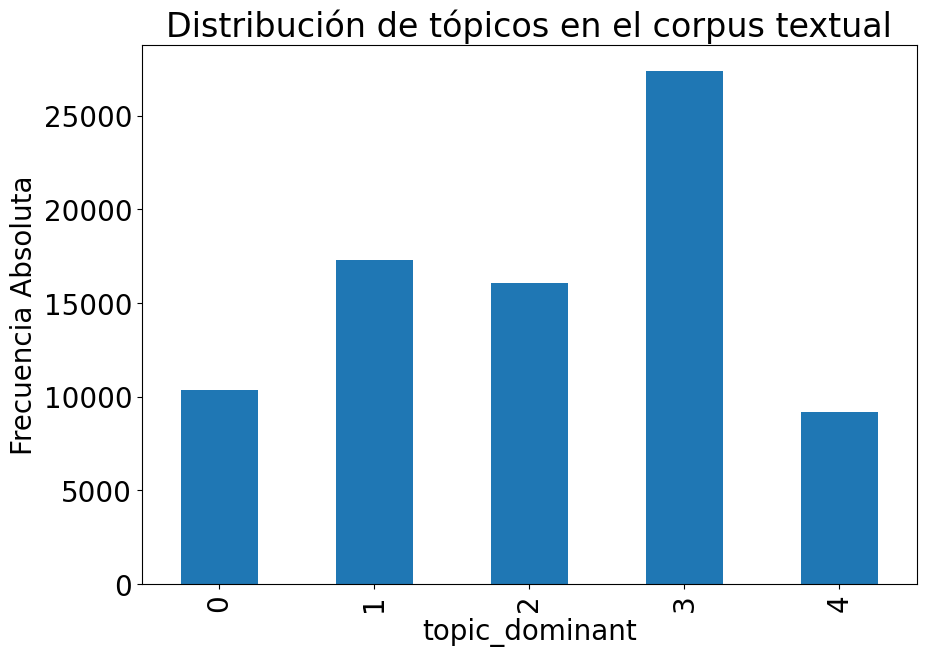

In [ ]:
# Se saca el número de tweets por tópico
df_topic = pd.read_csv('topic_model_results.csv', index_col=False)

df_topic["topic_dominant"].value_counts()

# Graficar esa distribución
plt.figure(figsize=(10,7))
ax=df_topic["topic_dominant"].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de tópicos en el corpus textual')
plt.show()

In [ ]:
#Se saca el número de tweets por tópico
df_topic["topic_dominant"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic_dominant
3    27400
1    17267
2    16046
0    10328
4     9178
Name: count, dtype: int64

## Analisis por Topicos

### Topico 1

In [ ]:
topic_1 = df_topic[df_topic['topic_dominant']==0]
dft=topic_1['lemmas']
dft= [x for x in dft if str(x) != 'nan']

# Unigramas
tfIdfVectorizer_uni=TfidfVectorizer(use_idf=True, ngram_range=(1,1))
tfIdf_uni = tfIdfVectorizer_uni.fit_transform(dft)
names_uni=tfIdfVectorizer_uni.get_feature_names_out()
freqs_uni = tfIdf_uni.sum(axis=0).A1
result_uni= dict(zip(names_uni, freqs_uni))

# Bigramas
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

# Trigramas
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri=tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri= dict(zip(names_tri, freqs_tri))

from operator import itemgetter

# Unigramas
results_sorted_uni=sorted(result_uni.items(), key = itemgetter(1), reverse = True)
print("Unigramas más relevantes:")
for key, value in results_sorted_uni[:10]:
    print(key, value)
print("\n")

# Bigramas
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
print("Bigramas más relevantes:")
for key, value in results_sorted_bi[:10]:
    print(key, value)
print("\n")

# Trigramas
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
print("Trigramas más relevantes:")
for key, value in results_sorted_tri[:10]:
    print(key, value)
print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unigramas más relevantes:
google 238.21349518312277
search 204.8784672875419
microsoft 163.1634784098515
bing 149.2557598693298
new 145.77735646016401
bard 134.9835699196459
openai 114.30540813996778
say 113.99451646555768
launch 113.76579587150957
year 110.95619796602301


Bigramas más relevantes:
search engine 70.28408720439452
sentiment result 50.67773313376764
artificial intelligence 39.00273164301097
result positive 31.7794698738399
google search 29.05014926051458
google bard 26.117522043231133
invest billion 24.360914570876723
million user 22.086647800537182
bing search 20.46448098257545
microsoft bing 17.980856821945952


Trigramas más relevantes:
sentiment result positive 31.905805153430514
sentiment result neutral 16.910025313507074
sentiment result negative 13.155781836679607
reach million user 12.475921761565884
bing search engine 12.143492651726175
invest billion creator 7.703835018772116
google search engine 7.620560049488154
multibillion dollar investment 7.15133402116261

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


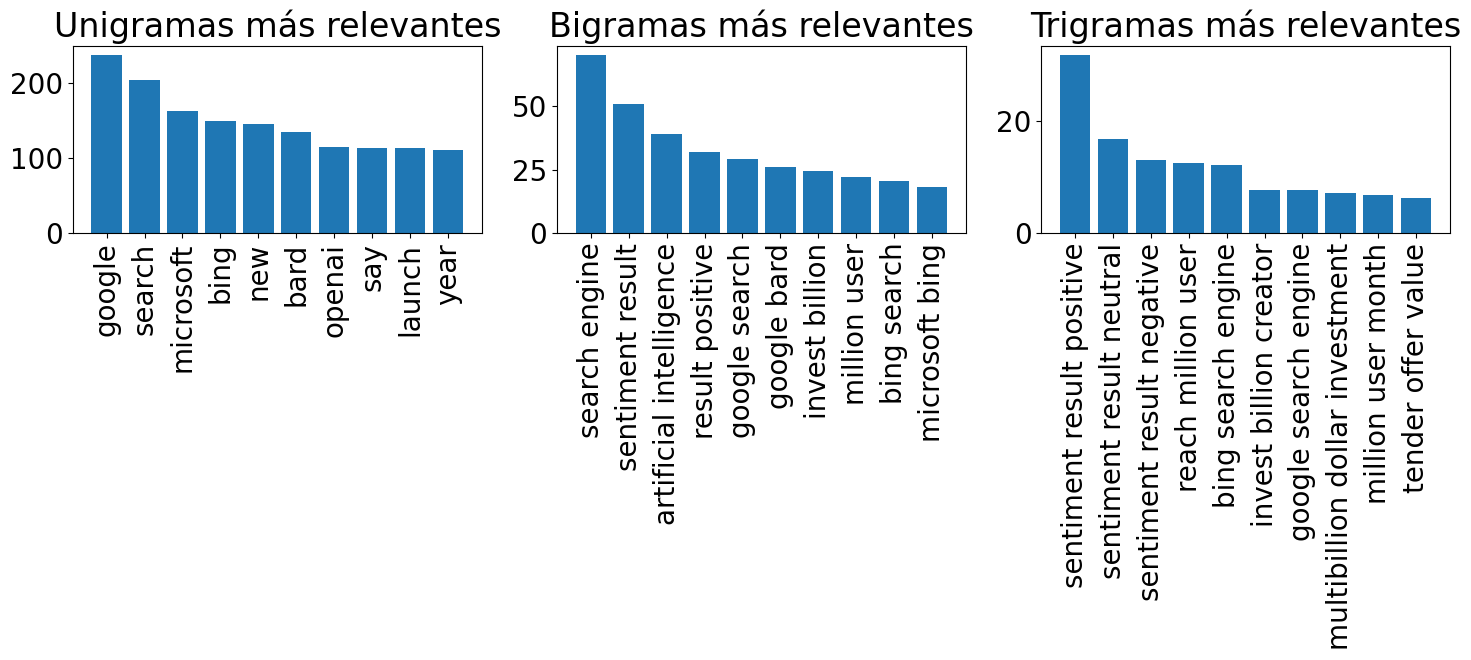

In [ ]:
# Se grafican los unigramas más relevantes
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([x[0] for x in results_sorted_uni[:10]], [x[1] for x in results_sorted_uni[:10]])
plt.title('Unigramas más relevantes')
plt.xticks(rotation=90)

# Se grafican los bigramas más relevantes
plt.subplot(1, 3, 2)
plt.bar([x[0] for x in results_sorted_bi[:10]], [x[1] for x in results_sorted_bi[:10]])
plt.title('Bigramas más relevantes')
plt.xticks(rotation=90)

# Se grafican los trigramas más relevantes
plt.subplot(1, 3, 3)
plt.bar([x[0] for x in results_sorted_tri[:10]], [x[1] for x in results_sorted_tri[:10]])
plt.title('Trigramas más relevantes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Topico 2

In [ ]:
topic_2 = df_topic[df_topic['topic_dominant']==1]
dft=topic_2['lemmas']
dft= [x for x in dft if str(x) != 'nan']

# Unigramas
tfIdfVectorizer_uni=TfidfVectorizer(use_idf=True, ngram_range=(1,1))
tfIdf_uni = tfIdfVectorizer_uni.fit_transform(dft)
names_uni=tfIdfVectorizer_uni.get_feature_names_out()
freqs_uni = tfIdf_uni.sum(axis=0).A1
result_uni= dict(zip(names_uni, freqs_uni))

# Bigramas
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

# Trigramas
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri=tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri= dict(zip(names_tri, freqs_tri))

from operator import itemgetter

# Unigramas
results_sorted_uni=sorted(result_uni.items(), key = itemgetter(1), reverse = True)
print("Unigramas más relevantes:")
for key, value in results_sorted_uni[:10]:
    print(key, value)
print("\n")

# Bigramas
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
print("Bigramas más relevantes:")
for key, value in results_sorted_bi[:10]:
    print(key, value)
print("\n")

# Trigramas
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
print("Trigramas más relevantes:")
for key, value in results_sorted_tri[:10]:
    print(key, value)
print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unigramas más relevantes:
new 282.3332897659012
article 265.4212825354277
future 262.8789182147461
thank 258.75632708007504
talk 255.7318216432632
read 254.20522336811595
great 254.01211190678833
use 240.98846923583443
learn 234.6148601866831
write 216.9371363588112


Bigramas más relevantes:
artificial intelligence 120.64174451821336
look forward 42.07680009040835
late article 35.642604510806294
check late 34.16079063160107
thank share 31.003688670344737
tool like 27.125170231794275
read article 24.8049856861638
share thought 23.58932603930317
high education 21.86425629936434
late episode 21.736109880758875


Trigramas más relevantes:
check late article 24.820675701209986
large language model 10.784407520671378
take world storm 8.610967341914964
future artificial intelligence 8.024073116928923
late article newsletter 7.470641709134985
artificial intelligence tool 7.042437512796018
use artificial intelligence 6.2692932607547505
artificial general intelligence 6.248919447549709
world ar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


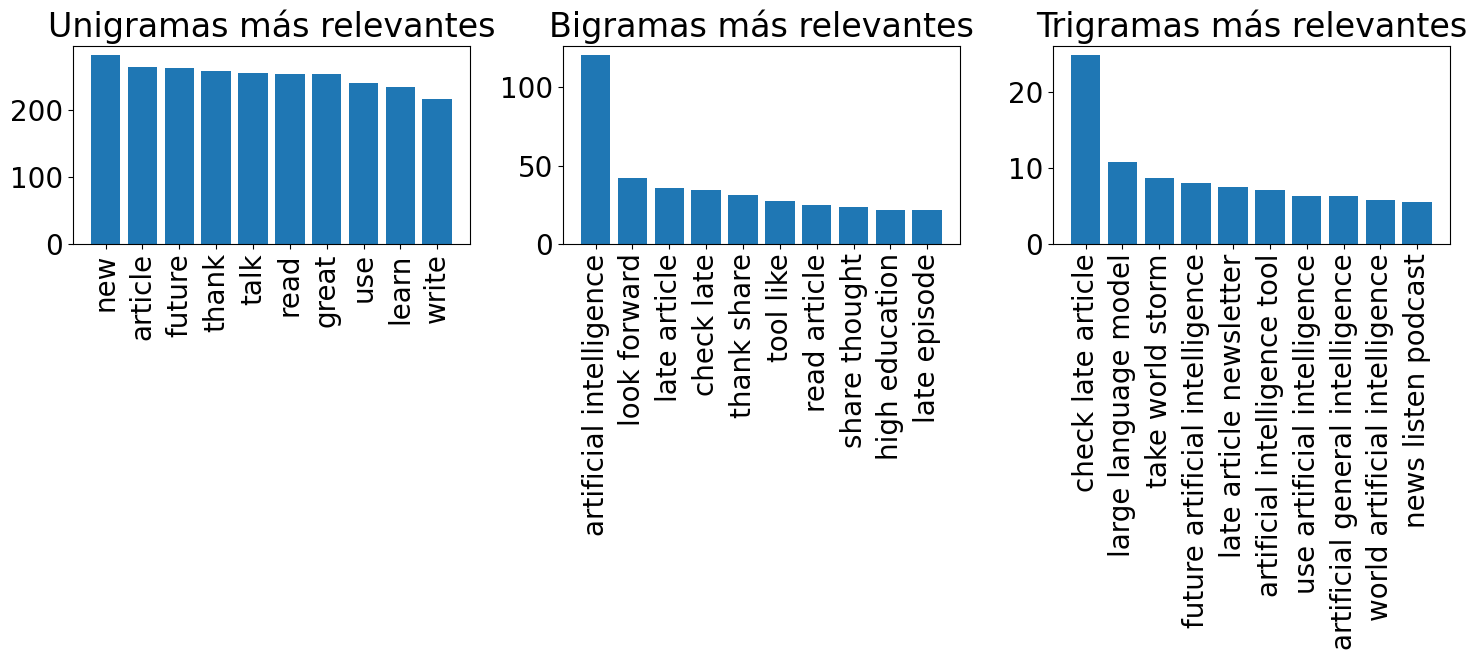

In [ ]:
# Se grafican los unigramas más relevantes
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([x[0] for x in results_sorted_uni[:10]], [x[1] for x in results_sorted_uni[:10]])
plt.title('Unigramas más relevantes')
plt.xticks(rotation=90)

# Se grafican los bigramas más relevantes
plt.subplot(1, 3, 2)
plt.bar([x[0] for x in results_sorted_bi[:10]], [x[1] for x in results_sorted_bi[:10]])
plt.title('Bigramas más relevantes')
plt.xticks(rotation=90)

# Se grafican los trigramas más relevantes
plt.subplot(1, 3, 3)
plt.bar([x[0] for x in results_sorted_tri[:10]], [x[1] for x in results_sorted_tri[:10]])
plt.title('Trigramas más relevantes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Topico 3

In [ ]:
topic_3 = df_topic[df_topic['topic_dominant']==2]
dft=topic_3['lemmas']
dft= [x for x in dft if str(x) != 'nan']

# Unigramas
tfIdfVectorizer_uni=TfidfVectorizer(use_idf=True, ngram_range=(1,1))
tfIdf_uni = tfIdfVectorizer_uni.fit_transform(dft)
names_uni=tfIdfVectorizer_uni.get_feature_names_out()
freqs_uni = tfIdf_uni.sum(axis=0).A1
result_uni= dict(zip(names_uni, freqs_uni))

# Bigramas
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

# Trigramas
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri=tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri= dict(zip(names_tri, freqs_tri))

from operator import itemgetter

# Unigramas
results_sorted_uni=sorted(result_uni.items(), key = itemgetter(1), reverse = True)
print("Unigramas más relevantes:")
for key, value in results_sorted_uni[:10]:
    print(key, value)
print("\n")

# Bigramas
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
print("Bigramas más relevantes:")
for key, value in results_sorted_bi[:10]:
    print(key, value)
print("\n")

# Trigramas
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
print("Trigramas más relevantes:")
for key, value in results_sorted_tri[:10]:
    print(key, value)
print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unigramas más relevantes:
new 354.4014242082834
use 298.92938575293266
tool 262.9888264090592
like 252.42082653849997
model 245.58020749886438
power 232.39748754368725
language 217.99446740096442
app 185.47608937971765
create 184.76259514036204
work 173.44203196323775


Bigramas más relevantes:
language model 95.81537947064393
game changer 46.279199469438566
large language 43.65281568129574
natural language 38.50735283136344
use case 35.039064225657285
tool like 28.165605350549296
open source 25.29748371269114
mind blow 24.673733581880438
content creation 24.496454914392274
exciting news 23.987515268291038


Trigramas más relevantes:
large language model 42.770973326426
natural language processing 16.667951949451687
com pay interest 11.776171137477197
interest free instalment 11.776171137477197
pay interest free 11.776171137477197
language model like 11.131564643593226
coincidentally available acquisition 8.430972766113342
powerful language model 8.201026327235667
important step journe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


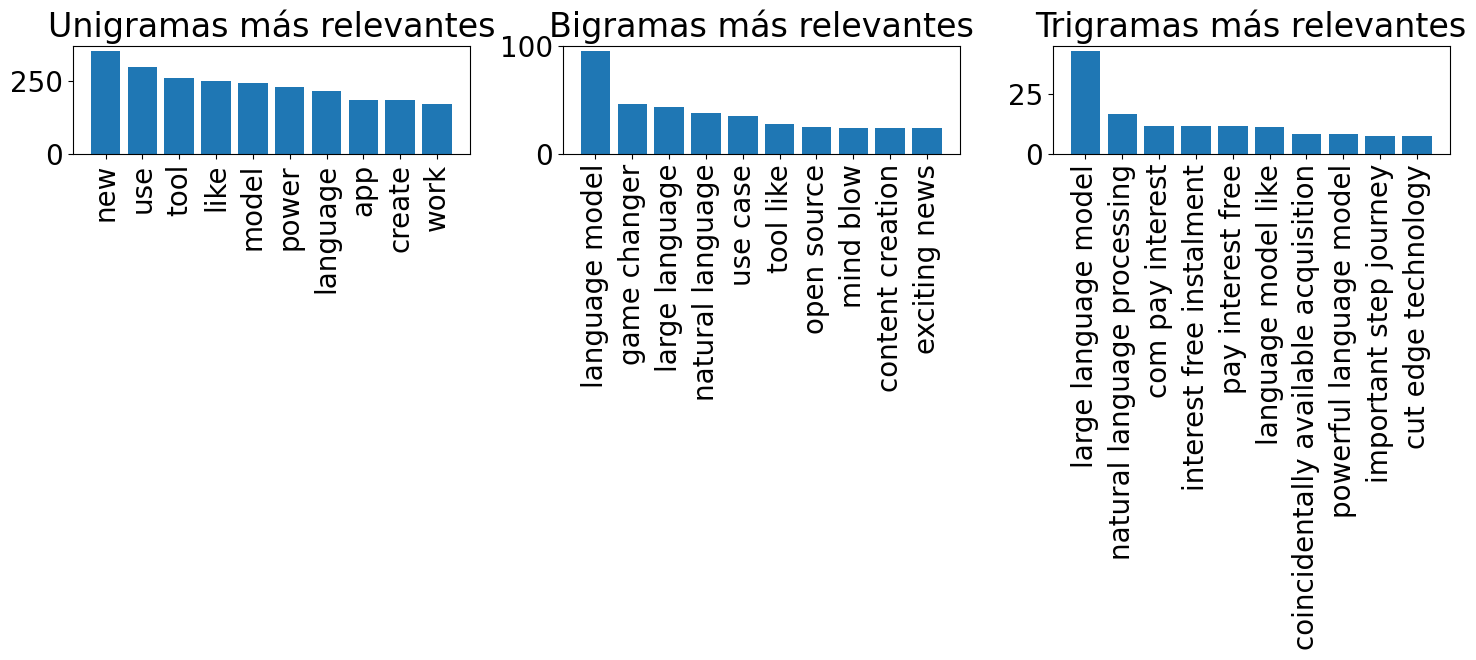

In [ ]:
# Se grafican los unigramas más relevantes
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([x[0] for x in results_sorted_uni[:10]], [x[1] for x in results_sorted_uni[:10]])
plt.title('Unigramas más relevantes')
plt.xticks(rotation=90)

# Se grafican los bigramas más relevantes
plt.subplot(1, 3, 2)
plt.bar([x[0] for x in results_sorted_bi[:10]], [x[1] for x in results_sorted_bi[:10]])
plt.title('Bigramas más relevantes')
plt.xticks(rotation=90)

# Se grafican los trigramas más relevantes
plt.subplot(1, 3, 3)
plt.bar([x[0] for x in results_sorted_tri[:10]], [x[1] for x in results_sorted_tri[:10]])
plt.title('Trigramas más relevantes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Topico 4

In [ ]:
topic_4 = df_topic[df_topic['topic_dominant']==3]
dft=topic_4['lemmas']
dft= [x for x in dft if str(x) != 'nan']

# Unigramas
tfIdfVectorizer_uni=TfidfVectorizer(use_idf=True, ngram_range=(1,1))
tfIdf_uni = tfIdfVectorizer_uni.fit_transform(dft)
names_uni=tfIdfVectorizer_uni.get_feature_names_out()
freqs_uni = tfIdf_uni.sum(axis=0).A1
result_uni= dict(zip(names_uni, freqs_uni))

# Bigramas
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

# Trigramas
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri=tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri= dict(zip(names_tri, freqs_tri))

from operator import itemgetter

# Unigramas
results_sorted_uni=sorted(result_uni.items(), key = itemgetter(1), reverse = True)
print("Unigramas más relevantes:")
for key, value in results_sorted_uni[:10]:
    print(key, value)
print("\n")

# Bigramas
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
print("Bigramas más relevantes:")
for key, value in results_sorted_bi[:10]:
    print(key, value)
print("\n")

# Trigramas
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
print("Trigramas más relevantes:")
for key, value in results_sorted_tri[:10]:
    print(key, value)
print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unigramas más relevantes:
ask 727.5408494064548
write 640.529330679067
like 502.56469409283784
think 465.1790026310224
use 449.03711359992576
answer 428.50898265230853
good 428.4084252578513
know 413.7951393338967
question 408.4665148943307
time 358.19888722299845


Bigramas más relevantes:
ask write 125.97494327019523
ask question 69.72035512274637
look like 61.97178595761626
answer question 51.656077016281266
write poem 50.37759733038408
feel like 31.374556183404778
sound like 28.955168758524675
write code 28.593388652786928
write song 27.450091196998166
tool like 26.296217793847084


Trigramas más relevantes:
ask write poem 28.866274325300992
ask write song 16.077337693223978
ask right question 9.520377948502501
ask write rap 7.555651194767915
let know think 7.345034142469764
campaign take creative 7.140582146904881
take creative world 7.140582146904881
ask write story 7.037394263757484
medical licensing exam 7.030156871631866
coinex gainer feb 6.798458932271172




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


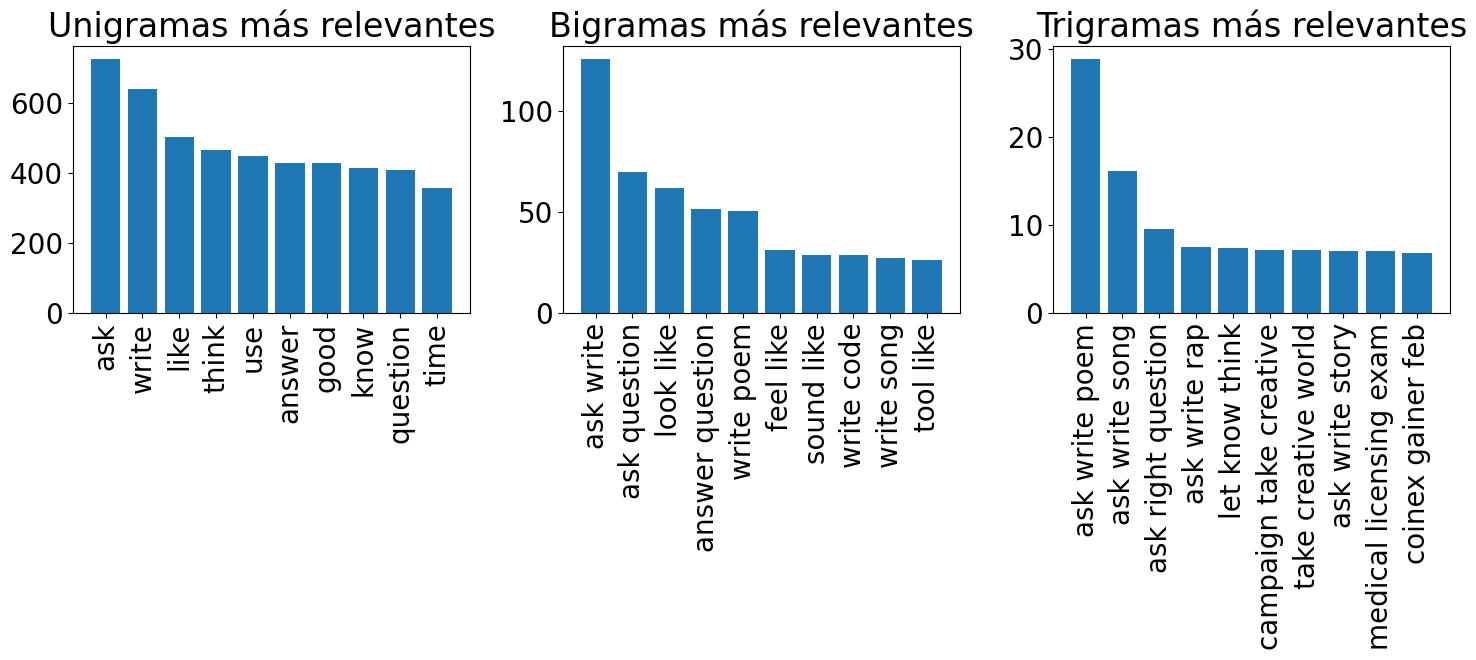

In [ ]:
# Se grafican los unigramas más relevantes
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([x[0] for x in results_sorted_uni[:10]], [x[1] for x in results_sorted_uni[:10]])
plt.title('Unigramas más relevantes')
plt.xticks(rotation=90)

# Se grafican los bigramas más relevantes
plt.subplot(1, 3, 2)
plt.bar([x[0] for x in results_sorted_bi[:10]], [x[1] for x in results_sorted_bi[:10]])
plt.title('Bigramas más relevantes')
plt.xticks(rotation=90)

# Se grafican los trigramas más relevantes
plt.subplot(1, 3, 3)
plt.bar([x[0] for x in results_sorted_tri[:10]], [x[1] for x in results_sorted_tri[:10]])
plt.title('Trigramas más relevantes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Topico 5

In [ ]:
topic_5 = df_topic[df_topic['topic_dominant']==4]
dft=topic_5['lemmas']
dft= [x for x in dft if str(x) != 'nan']

# Unigramas
tfIdfVectorizer_uni=TfidfVectorizer(use_idf=True, ngram_range=(1,1))
tfIdf_uni = tfIdfVectorizer_uni.fit_transform(dft)
names_uni=tfIdfVectorizer_uni.get_feature_names_out()
freqs_uni = tfIdf_uni.sum(axis=0).A1
result_uni= dict(zip(names_uni, freqs_uni))

# Bigramas
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

# Trigramas
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri=tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri= dict(zip(names_tri, freqs_tri))

from operator import itemgetter

# Unigramas
results_sorted_uni=sorted(result_uni.items(), key = itemgetter(1), reverse = True)
print("Unigramas más relevantes:")
for key, value in results_sorted_uni[:10]:
    print(key, value)
print("\n")

# Bigramas
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
print("Bigramas más relevantes:")
for key, value in results_sorted_bi[:10]:
    print(key, value)
print("\n")

# Trigramas
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
print("Trigramas más relevantes:")
for key, value in results_sorted_tri[:10]:
    print(key, value)
print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unigramas más relevantes:
generate 144.146569241674
create 141.46141026170216
like 118.74876225193977
use 115.46802364759766
text 110.61829927578157
video 107.05147427417658
bias 94.52382397194074
thank 91.96206086565786
need 90.81550622693689
image 86.46802601034479


Bigramas más relevantes:
language model 28.89120972990363
elon musk 27.124366593993347
generate text 18.941965043627246
thank inclusion 18.133882783092282
sam altman 16.973708226482486
social medium 14.35141202057635
inclusion dear 14.131191181957835
large language 13.842542161978985
political bias 12.974552897413655
share thank 12.443590620354879


Trigramas más relevantes:
thank inclusion dear 13.913292411494343
large language model 13.757738601046045
share thank inclusion 13.4709896937455
great share thank 11.476271805614532
detect generate text 7.391998588567891
ceo sam altman 5.11413497422415
language model like 5.104217445364931
high quality prompt 4.879247047440786
tool detect generate 4.718568829702362
human like

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


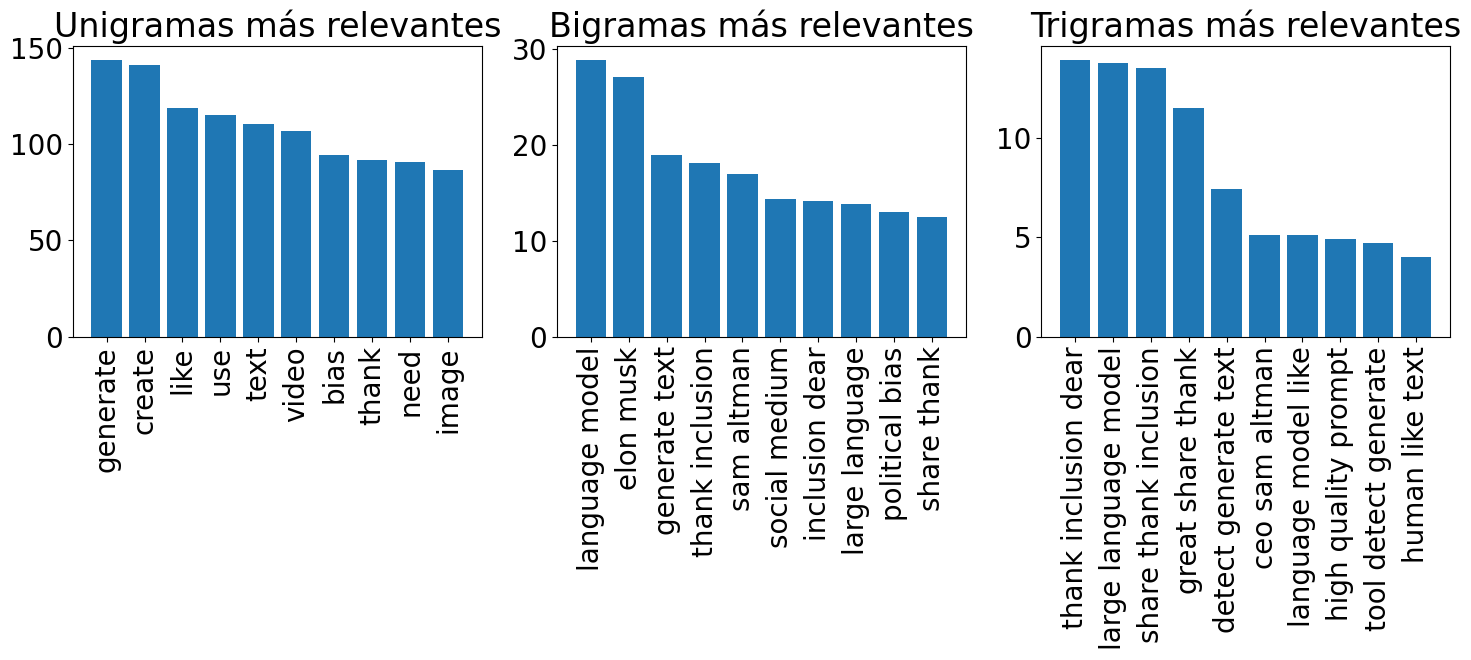

In [ ]:
# Se grafican los unigramas más relevantes
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([x[0] for x in results_sorted_uni[:10]], [x[1] for x in results_sorted_uni[:10]])
plt.title('Unigramas más relevantes')
plt.xticks(rotation=90)

# Se grafican los bigramas más relevantes
plt.subplot(1, 3, 2)
plt.bar([x[0] for x in results_sorted_bi[:10]], [x[1] for x in results_sorted_bi[:10]])
plt.title('Bigramas más relevantes')
plt.xticks(rotation=90)

# Se grafican los trigramas más relevantes
plt.subplot(1, 3, 3)
plt.bar([x[0] for x in results_sorted_tri[:10]], [x[1] for x in results_sorted_tri[:10]])
plt.title('Trigramas más relevantes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Analisis de Sentimientos

In [ ]:
%cd /content/drive/MyDrive/
# Se importa el csv que contiene los resultados del MODELADO DE TOPICOS
df_topics=pd.read_csv('topic_model_results.csv', index_col=False)
df_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/content/drive/MyDrive


,Unnamed: 0,id,text,user,fecha,retweet_number,like_number,hashtags,mentions,month,day,idioma,longitud,dia_semana,cleaned_text,lemmas,tokens,lda_features,topic_dominant
0,14,1641212328900284418,You know what a good feature be in ChatGPT @Op...,a_hafez12,2023-03-29,0.0,1.0,"#AI, #ChatGPT",@OpenAI,3,29,english,282,Wednesday,know good feature chatgpt sharing link convers...,know good feature share link conversation make...,"['know', 'good', 'feature', 'share', 'link', '...",[0.0101381 0.21995316 0.32713479 0.43254957 0...,3
1,16,1641212198180511745,Though it primarily targets companies like Tik...,crypto_talkies,2023-03-29,0.0,0.0,"#BTC, #Bitcoin, #CryptoNews, #cryptomarket, #C...",@crypto_talkies,3,29,english,255,Wednesday,though primarily targets companies like tik to...,primarily target company like tik tok bill lan...,"['primarily', 'target', 'company', 'like', 'ti...",[0.43820897 0.01184193 0.01202546 0.09429409 0...,4
2,19,1641212064705449985,@techAU @elonmusk @TheChiefNerd Walt Disney tr...,SpiderMonkeyXYZ,2023-03-29,0.0,0.0,"#ChatGPT, #AGI","@techAU, @elonmusk, @TheChiefNerd",3,29,english,101,Wednesday,walt disney tried warn,walt disney try warn,"['walt', 'disney', 'try', 'warn']",[0.04218027 0.04219965 0.04183376 0.62138319 0...,3
3,25,1641211666762178561,ChatGPT: Why we're still smarter than machines...,roxana_huaman,2023-03-29,0.0,0.0,"#ChatGPT, #AI",@BBC_Reel,3,29,scots,97,Wednesday,chatgpt still smarter machines via,smart machine,"['smart', 'machine']",[0.06773147 0.06772979 0.06762148 0.72853053 0...,3
4,28,1641211554476576770,@elonmusk @TheChiefNerd Policymakers are the w...,iamhilarry3090,2023-03-29,0.0,1.0,"#ai, #chatgpt","@elonmusk, @TheChiefNerd",3,29,english,162,Wednesday,policymakers worst people develop safety proto...,policymaker bad people develop safety protocol...,"['policymaker', 'bad', 'people', 'develop', 's...",[0.43042028 0.01670634 0.01736821 0.01721136 0...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80214,459668,1610539337845989376,@warrbo @RadioFreeTom #ChatGPT doesn't think: ...,marioPS,2023-01-04,0.0,1.0,#ChatGPT,"@warrbo, @RadioFreeTom",1,4,english,306,Wednesday,doesn think magnificently aggregates opinions ...,think magnificently aggregate opinion quantify...,"['think', 'magnificently', 'aggregate', 'opini...",[0.07555224 0.06566119 0.30718824 0.42479903 0...,3
80215,459669,1610539226734694400,Twitter should add #ChatGPT as a native featur...,Helghardt,2023-01-04,0.0,1.0,#ChatGPT,@elonmusk,1,4,english,252,Wednesday,twitter add native feature can read people say...,add native feature read people deeply ask ques...,"['add', 'native', 'feature', 'read', 'people',...",[0.01357183 0.12908581 0.25452822 0.58907813 0...,3
80216,459686,1610537666734333952,Is there any reason for that ? #chatGPT @gptne...,Royi_Namir,2023-01-04,1.0,2.0,#chatGPT,@gptnews1,1,4,english,96,Wednesday,reason completely wrong,reason completely wrong,"['reason', 'completely', 'wrong']",[0.05076027 0.05001684 0.05006624 0.05088456 0...,4
80217,459694,1610536038094757888,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,Pup_In_Cup,2023-01-04,0.0,1.0,"#LAMDA, #ChatGPT","@GoogleAI, @OpenAI, @Marktechpost",1,4,english,277,Wednesday,versus cares lamda isn available chatgpt reaso...,versus care lamda available reason interested ...,"['versus', 'care', 'lamda', 'available', 'reas...",[0.09526262 0.01185017 0.08190773 0.72761315 0...,3


In [ ]:
# Se conservan unicamente las columnas relevantes para el ANALISIS DE SENTIMIENTOS
df_topics= df_topics.iloc[:,[15,16,17,18]]
df_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lemmas,tokens,lda_features,topic_dominant
0,know good feature share link conversation make...,"['know', 'good', 'feature', 'share', 'link', '...",[0.0101381 0.21995316 0.32713479 0.43254957 0...,3
1,primarily target company like tik tok bill lan...,"['primarily', 'target', 'company', 'like', 'ti...",[0.43820897 0.01184193 0.01202546 0.09429409 0...,4
2,walt disney try warn,"['walt', 'disney', 'try', 'warn']",[0.04218027 0.04219965 0.04183376 0.62138319 0...,3
3,smart machine,"['smart', 'machine']",[0.06773147 0.06772979 0.06762148 0.72853053 0...,3
4,policymaker bad people develop safety protocol...,"['policymaker', 'bad', 'people', 'develop', 's...",[0.43042028 0.01670634 0.01736821 0.01721136 0...,4
...,...,...,...,...
80214,think magnificently aggregate opinion quantify...,"['think', 'magnificently', 'aggregate', 'opini...",[0.07555224 0.06566119 0.30718824 0.42479903 0...,3
80215,add native feature read people deeply ask ques...,"['add', 'native', 'feature', 'read', 'people',...",[0.01357183 0.12908581 0.25452822 0.58907813 0...,3
80216,reason completely wrong,"['reason', 'completely', 'wrong']",[0.05076027 0.05001684 0.05006624 0.05088456 0...,4
80217,versus care lamda available reason interested ...,"['versus', 'care', 'lamda', 'available', 'reas...",[0.09526262 0.01185017 0.08190773 0.72761315 0...,3


In [ ]:
# Se importa el dataset que contiene el texto con pre-procesamiento especifico para ANALISIS DE SENTIMIENTOS
# Este procedimiento se llevó a cabo en RStudio
%cd /content/drive/MyDrive/
df_sentiment = pd.read_csv('df_sent_analysis.csv', sep= ";")
df_sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/content/drive/MyDrive


,X,id,text,user,fecha,retweet_number,like_number,hashtags,mentions,month,day,idioma,longitud,dia_semana,cleaned_text,lemmas
0,14,1641212328900284416,You know what good feature ChatGPT ? Sharing l...,a_hafez12,2023-03-29,0,1,"#AI, #ChatGPT",@OpenAI,3,29,english,282,Wednesday,know good feature chatgpt sharing link convers...,know good feature share link conversation make...
1,16,1641212198180511744,Though primarily targets companies like Tik-To...,crypto_talkies,2023-03-29,0,0,"#BTC, #Bitcoin, #CryptoNews, #cryptomarket, #C...",@crypto_talkies,3,29,english,255,Wednesday,though primarily targets companies like tik to...,primarily target company like tik tok bill lan...
2,19,1641212064705449984,Walt Disney tried warn us...,SpiderMonkeyXYZ,2023-03-29,0,0,"#ChatGPT, #AGI","@techAU, @elonmusk, @TheChiefNerd",3,29,english,101,Wednesday,walt disney tried warn,walt disney try warn
3,25,1641211666762178560,ChatGPT: Why we'still smarter than machines via,roxana_huaman,2023-03-29,0,0,"#ChatGPT, #AI",@BBC_Reel,3,29,scots,97,Wednesday,chatgpt still smarter machines via,smart machine
4,28,1641211554476576768,Policymakers are the worst people develop safe...,iamhilarry3090,2023-03-29,0,1,"#ai, #chatgpt","@elonmusk, @TheChiefNerd",3,29,english,162,Wednesday,policymakers worst people develop safety proto...,policymaker bad people develop safety protocol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90735,459668,1610539337845989120,doesn'think: magnificently aggregates opinions...,marioPS,2023-01-04,0,1,#ChatGPT,"@warrbo, @RadioFreeTom",1,4,english,306,Wednesday,doesn think magnificently aggregates opinions ...,think magnificently aggregate opinion quantify...
90736,459669,1610539226734694400,Twitter should add native feature. Not only ca...,Helghardt,2023-01-04,0,1,#ChatGPT,@elonmusk,1,4,english,252,Wednesday,twitter add native feature can read people say...,add native feature read people deeply ask ques...
90737,459686,1610537666734333952,there any reason for that ? It'completely wrong,Royi_Namir,2023-01-04,1,2,#chatGPT,@gptnews1,1,4,english,96,Wednesday,reason completely wrong,reason completely wrong
90738,459694,1610536038094757888,Versus ?! Who cares? Lamda isn'available. Chat...,Pup_In_Cup,2023-01-04,0,1,"#LAMDA, #ChatGPT","@GoogleAI, @OpenAI, @Marktechpost",1,4,english,277,Wednesday,versus cares lamda isn available chatgpt reaso...,versus care lamda available reason interested ...


In [ ]:
# Se unen ambos dataframes, a traves de la columna lemmas que es coincidente en ambos
df_topics_complete=pd.merge(df_sentiment,df_topics,on='lemmas',how='left')
df_topics_complete

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,X,id,text,user,fecha,retweet_number,like_number,hashtags,mentions,month,day,idioma,longitud,dia_semana,cleaned_text,lemmas,tokens,lda_features,topic_dominant
0,14,1641212328900284416,You know what good feature ChatGPT ? Sharing l...,a_hafez12,2023-03-29,0,1,"#AI, #ChatGPT",@OpenAI,3,29,english,282,Wednesday,know good feature chatgpt sharing link convers...,know good feature share link conversation make...,"['know', 'good', 'feature', 'share', 'link', '...",[0.0101381 0.21995316 0.32713479 0.43254957 0...,3
1,16,1641212198180511744,Though primarily targets companies like Tik-To...,crypto_talkies,2023-03-29,0,0,"#BTC, #Bitcoin, #CryptoNews, #cryptomarket, #C...",@crypto_talkies,3,29,english,255,Wednesday,though primarily targets companies like tik to...,primarily target company like tik tok bill lan...,"['primarily', 'target', 'company', 'like', 'ti...",[0.43820897 0.01184193 0.01202546 0.09429409 0...,4
2,19,1641212064705449984,Walt Disney tried warn us...,SpiderMonkeyXYZ,2023-03-29,0,0,"#ChatGPT, #AGI","@techAU, @elonmusk, @TheChiefNerd",3,29,english,101,Wednesday,walt disney tried warn,walt disney try warn,"['walt', 'disney', 'try', 'warn']",[0.04218027 0.04219965 0.04183376 0.62138319 0...,3
3,25,1641211666762178560,ChatGPT: Why we'still smarter than machines via,roxana_huaman,2023-03-29,0,0,"#ChatGPT, #AI",@BBC_Reel,3,29,scots,97,Wednesday,chatgpt still smarter machines via,smart machine,"['smart', 'machine']",[0.06773147 0.06772979 0.06762148 0.72853053 0...,3
4,28,1641211554476576768,Policymakers are the worst people develop safe...,iamhilarry3090,2023-03-29,0,1,"#ai, #chatgpt","@elonmusk, @TheChiefNerd",3,29,english,162,Wednesday,policymakers worst people develop safety proto...,policymaker bad people develop safety protocol...,"['policymaker', 'bad', 'people', 'develop', 's...",[0.43042028 0.01670634 0.01736821 0.01721136 0...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90735,459668,1610539337845989120,doesn'think: magnificently aggregates opinions...,marioPS,2023-01-04,0,1,#ChatGPT,"@warrbo, @RadioFreeTom",1,4,english,306,Wednesday,doesn think magnificently aggregates opinions ...,think magnificently aggregate opinion quantify...,"['think', 'magnificently', 'aggregate', 'opini...",[0.07555224 0.06566119 0.30718824 0.42479903 0...,3
90736,459669,1610539226734694400,Twitter should add native feature. Not only ca...,Helghardt,2023-01-04,0,1,#ChatGPT,@elonmusk,1,4,english,252,Wednesday,twitter add native feature can read people say...,add native feature read people deeply ask ques...,"['add', 'native', 'feature', 'read', 'people',...",[0.01357183 0.12908581 0.25452822 0.58907813 0...,3
90737,459686,1610537666734333952,there any reason for that ? It'completely wrong,Royi_Namir,2023-01-04,1,2,#chatGPT,@gptnews1,1,4,english,96,Wednesday,reason completely wrong,reason completely wrong,"['reason', 'completely', 'wrong']",[0.05076027 0.05001684 0.05006624 0.05088456 0...,4
90738,459694,1610536038094757888,Versus ?! Who cares? Lamda isn'available. Chat...,Pup_In_Cup,2023-01-04,0,1,"#LAMDA, #ChatGPT","@GoogleAI, @OpenAI, @Marktechpost",1,4,english,277,Wednesday,versus cares lamda isn available chatgpt reaso...,versus care lamda available reason interested ...,"['versus', 'care', 'lamda', 'available', 'reas...",[0.09526262 0.01185017 0.08190773 0.72761315 0...,3


In [ ]:
# Comprobar la longitud del dataframe generado
len(df_topics_complete)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


90740

In [ ]:
# Tokenize the data
def tokenize(text):
    text = str(text) # Convertir el texto a cadena
    tokens = text.split() #Dividir el texto en tokens
    return tokens

df_topics_complete ['tokens'] = df_topics_complete['text'].apply(tokenize) # Aplicar la función tokenize a la columna 'text' del DataFrame df_topics_complete
print(df_topics_complete.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    X                   id                                               text  \
0  14  1641212328900284416  You know what good feature ChatGPT ? Sharing l...   
1  16  1641212198180511744  Though primarily targets companies like Tik-To...   
2  19  1641212064705449984                       Walt Disney tried warn us...   
3  25  1641211666762178560    ChatGPT: Why we'still smarter than machines via   
4  28  1641211554476576768  Policymakers are the worst people develop safe...   

              user       fecha  retweet_number  like_number  \
0        a_hafez12  2023-03-29               0            1   
1   crypto_talkies  2023-03-29               0            0   
2  SpiderMonkeyXYZ  2023-03-29               0            0   
3    roxana_huaman  2023-03-29               0            0   
4   iamhilarry3090  2023-03-29               0            1   

                                            hashtags  \
0                                      #AI, #ChatGPT   
1  #BTC, #Bitcoin, #Cr

In [ ]:
# Definir funcion para encontrar la puntuacion de los textos
def tweet_scores(data_frame):

    # Crear un objeto SentimentIntensityAnalyzer.
    sid_obj = SentimentIntensityAnalyzer()
    scores = []
    n = data_frame.shape[0]
    for i in range(n):
      sentence = data_frame.iloc[i]
      sentiment_dict = sid_obj.polarity_scores(sentence)
      compound = sentiment_dict['compound']
      scores.append(compound)
    return scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Aplicar la funcion al conjunto de datos
df_topics_complete['scores']=tweet_scores(df_topics_complete['text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_topics_complete
# Exportar los resultados a un CSV
df_topics_complete.to_csv('SF_Sentiment_Analisis_complete')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Asegurar que la fecha se encuentra en el formato necesario para realizar los siguientes pasos
df_topics_complete['date'] = df_sentiment['fecha'].astype('datetime64[ns]')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


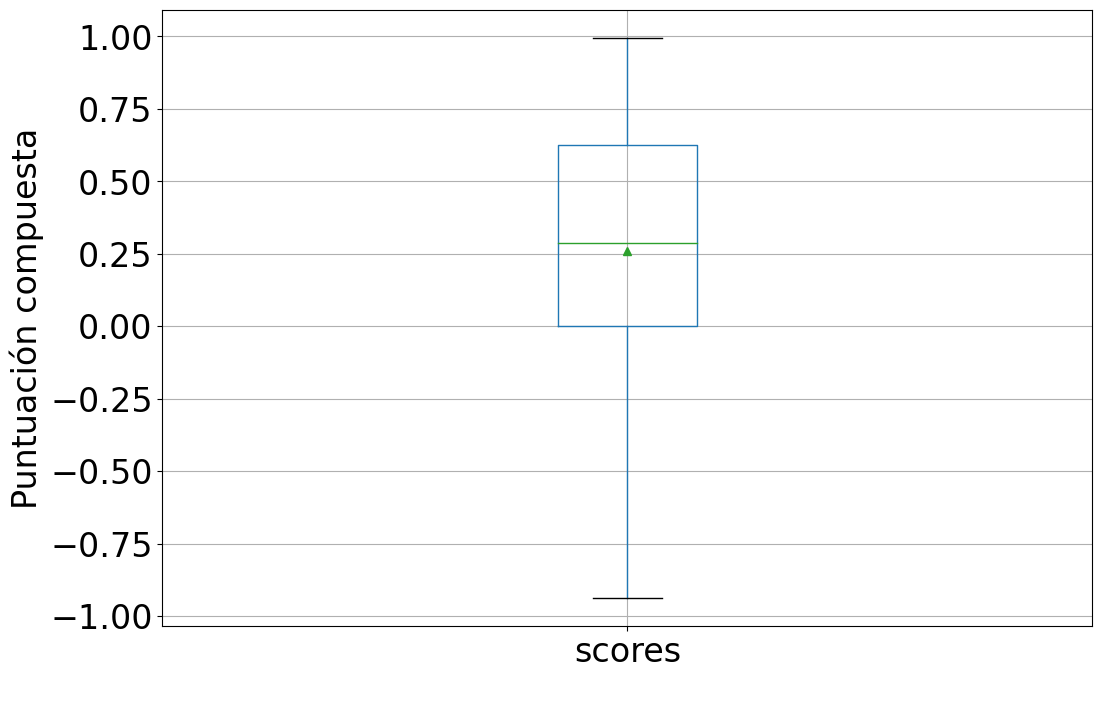

In [ ]:
# Leer el DataFrame desde el archivo CSV
df_topics_complete = pd.read_csv('SF_Sentiment_Analisis_complete', index_col=False)
# Crear el diagrama de caja para la columna 'scores' del DataFrame
ax1 = df_topics_complete.boxplot(column='scores', figsize=(12,8), showmeans=True, showfliers=False, fontsize=24)
# Establecer etiquetas para los ejes
ax1.set_ylabel('Puntuación compuesta', fontsize=24)
ax1.set_xlabel(' ', fontsize=24)
# Mostrar el diagrama de caja
plt.show()

In [ ]:
# Exportar resultados a CSV
df_topics_complete['scores'].to_csv('SF_Scores')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Obtener descripcion de los estadisticos visible a traves del BOXPLOT
df_topics_complete['scores'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    90740.000000
mean         0.258613
std          0.421449
min         -0.973300
25%          0.000000
50%          0.286900
75%          0.624900
max          0.995700
Name: scores, dtype: float64

In [ ]:
# Agrupar los scores por fecha
df_bygroup=pd.DataFrame(df_topics_complete.groupby(['date'])['scores'].agg('sum'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear un nuevo DataFrame con el recuento de tweets por fecha
df_bycount = pd.DataFrame(df_topics_complete.groupby(['date']).agg('count'))
# Exportar el DataFrame como un archivo CSV
df_bycount.to_csv("Chat_SA_Freq.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Asignar el índice como una columna llamada 'date'
df_bygroup['date'] = df_bygroup.index
# Exportar el DataFrame como un archivo CSV
df_bygroup.to_csv('Chat_SA_dates.csv')
# Mostrar el DataFrame
df_bygroup

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,scores,date
date,,
2023-01-04,152.3879,2023-01-04
2023-01-05,234.0471,2023-01-05
2023-01-06,243.5027,2023-01-06
2023-01-07,202.5124,2023-01-07
2023-01-08,169.1550,2023-01-08
...,...,...
2023-03-25,242.4873,2023-03-25
2023-03-26,247.0922,2023-03-26
2023-03-27,319.8323,2023-03-27


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([  183.,   500.,   664.,  1010.,  1067.,  1451.,  1418.,  1779.,
         2013.,  1152.,  1250.,  1076., 25096.,  1772.,  2215.,  2715.,
         5113.,  6231.,  5449.,  4778.,  5511.,  5800.,  5576.,  5078.,
         1843.]),
 array([-0.9733 , -0.89454, -0.81578, -0.73702, -0.65826, -0.5795 ,
        -0.50074, -0.42198, -0.34322, -0.26446, -0.1857 , -0.10694,
        -0.02818,  0.05058,  0.12934,  0.2081 ,  0.28686,  0.36562,
         0.44438,  0.52314,  0.6019 ,  0.68066,  0.75942,  0.83818,
         0.91694,  0.9957 ]),
 <BarContainer object of 25 artists>)

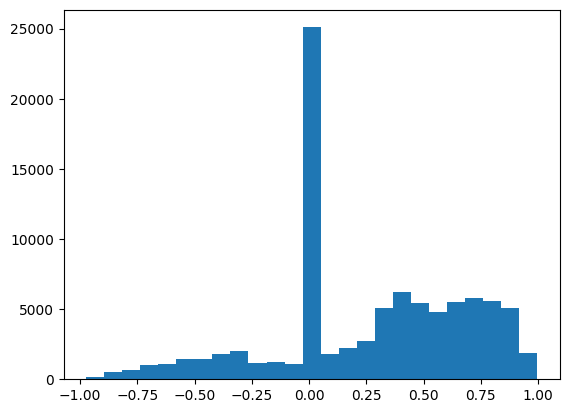

In [ ]:
# Graficar un histograma de las puntuaciones compuestas
plt.hist(df_topics_complete['scores'], bins=25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


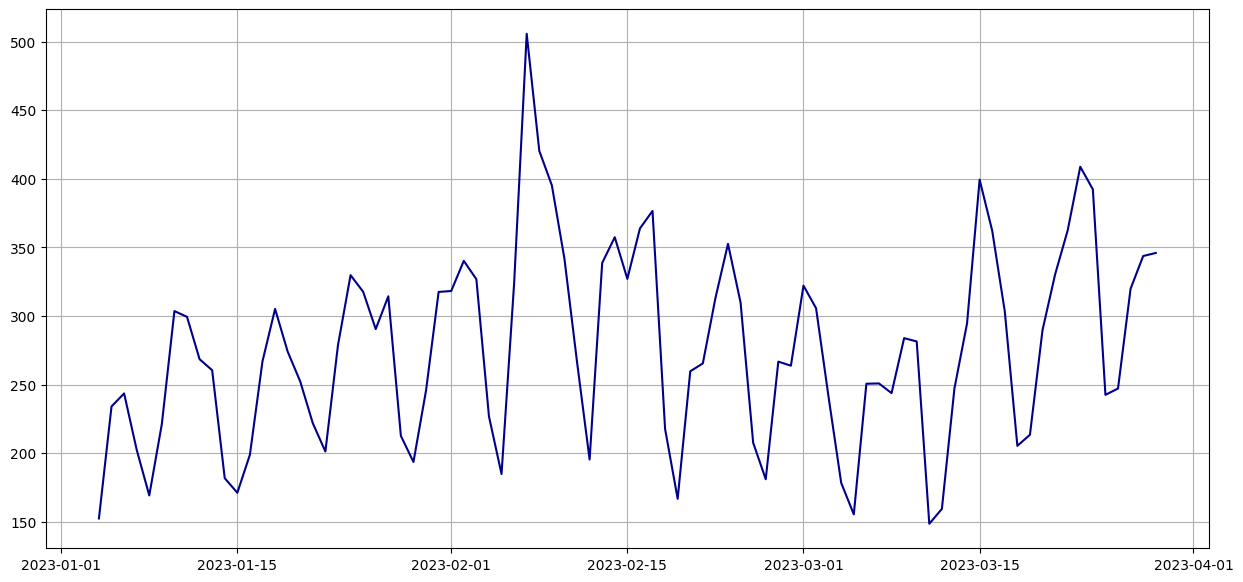

In [ ]:
# Graficar la serie de tiempo de las puntuaciones compuestas
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")
plt.grid()
plt.show()

In [ ]:
# Obtener descripicon de los estadisticos mas improtantes
df_topics_complete['scores'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    90740.000000
mean         0.258613
std          0.421449
min         -0.973300
25%          0.000000
50%          0.286900
75%          0.624900
max          0.995700
Name: scores, dtype: float64

In [ ]:
# Crear un nuevo DataFrame con la suma de puntuaciones por día de la semana
df_byweekday = pd.DataFrame(df_topics_complete.groupby(['dia_semana'])['scores'].agg('sum'))
# Asignar el índice como una columna llamada 'dia_semana'
df_byweekday['dia_semana'] = df_byweekday.index
# Exportar el DataFrame como un archivo CSV
df_byweekday.to_csv("Chat_SA_dates_weekday.csv")
# Crear otro DataFrame con el recuento de tweets por día de la semana
df_byweekday_count = pd.DataFrame(df_topics_complete.groupby(['dia_semana']).agg('count'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Graficar las puntuaciones en funcion del día de la semana
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_byweekday['dia_semana'],df_byweekday['scores'],color="darkblue")
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 'dia_semana'

<Figure size 1500x700 with 0 Axes>

### Graficos por Topico

In [ ]:
#  Obtener la evolucion del sentimiento para el TOPICO 1 y graficar los resultados
topic_1_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==0]
topic_1_sentiment = topic_1_sentiment[topic_1_sentiment.date.notnull()]
df_bygroup=pd.DataFrame(topic_1_sentiment.groupby(['date'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Chat_SA_dates_1.csv')
df_bygroup

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,scores,date
date,,
2023-01-04,9.4709,2023-01-04
2023-01-05,15.3072,2023-01-05
2023-01-06,31.5991,2023-01-06
2023-01-07,10.6537,2023-01-07
2023-01-08,13.6843,2023-01-08
...,...,...
2023-03-25,12.6355,2023-03-25
2023-03-26,12.4879,2023-03-26
2023-03-27,14.1075,2023-03-27


In [ ]:
# Calcular resumen de las puntuaciones
max_score = df_bygroup['scores'].max()
min_score = df_bygroup['scores'].min()
mean_score = df_bygroup['scores'].mean()
std_score = df_bygroup['scores'].std()  # Desviación estándar
skew_score = df_bygroup['scores'].skew()  # Coeficiente de asimetría

# Mostrar el resumen
print("Resumen de las puntuaciones:")
print("Puntuación Máximo:", max_score)
print("Puntuación Mínimo:", min_score)
print("Media de las puntuaciones:", mean_score)
print("Desviación Estándar de las puntuaciones:", std_score)
print("Coeficiente de Asimetría de las puntuaciones:", skew_score)


Resumen de los puntajes:
Puntaje Máximo: 66.5248
Puntaje Mínimo: -1.5264000000000002
Media de los Puntajes: 17.990945882352946
Desviación Estándar de los Puntajes: 9.862846758133138
Coeficiente de Asimetría de los Puntajes: 1.795029627395357


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


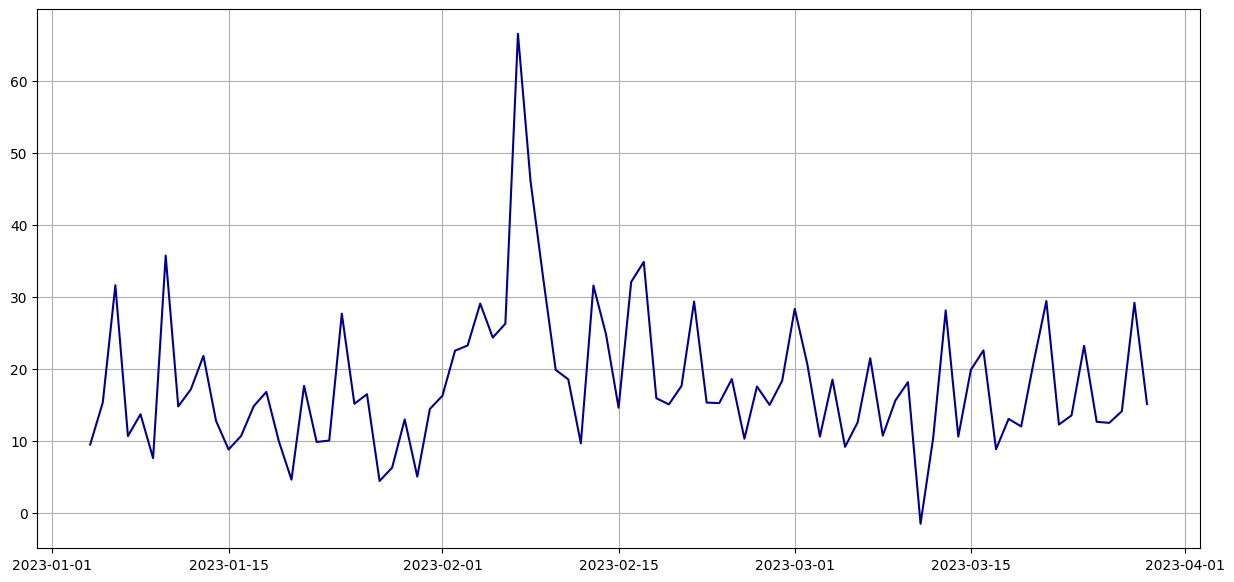

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")
#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
#  Obtener la evolucion del sentimiento para el TOPICO 2 y graficar los resultados
topic_2_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==1]
topic_2_sentiment = topic_2_sentiment[topic_2_sentiment.date.notnull()]
df_bygroup=pd.DataFrame(topic_2_sentiment.groupby(['date'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Chat_SA_dates_2.csv')
df_bygroup

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,scores,date
date,,
2023-01-04,27.5652,2023-01-04
2023-01-05,45.3931,2023-01-05
2023-01-06,48.7790,2023-01-06
2023-01-07,42.9197,2023-01-07
2023-01-08,25.1599,2023-01-08
...,...,...
2023-03-25,61.2142,2023-03-25
2023-03-26,62.3759,2023-03-26
2023-03-27,85.6344,2023-03-27


In [ ]:
# Calcular resumen de las puntuaciones
max_score = df_bygroup['scores'].max()
min_score = df_bygroup['scores'].min()
mean_score = df_bygroup['scores'].mean()
std_score = df_bygroup['scores'].std()  # Desviación estándar
skew_score = df_bygroup['scores'].skew()  # Coeficiente de asimetría

# Mostrar el resumen
print("Resumen de las puntuaciones:")
print("Puntuación Máximo:", max_score)
print("Puntuación Mínimo:", min_score)
print("Media de las puntuaciones:", mean_score)
print("Desviación Estándar de las puntuaciones:", std_score)
print("Coeficiente de Asimetría de las puntuaciones:", skew_score)


Resumen de los puntajes:
Puntaje Máximo: 125.4172
Puntaje Mínimo: 24.5284
Media de los Puntajes: 71.87108705882355
Desviación Estándar de los Puntajes: 24.96474477469505
Coeficiente de Asimetría de los Puntajes: -0.12174643529491365


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


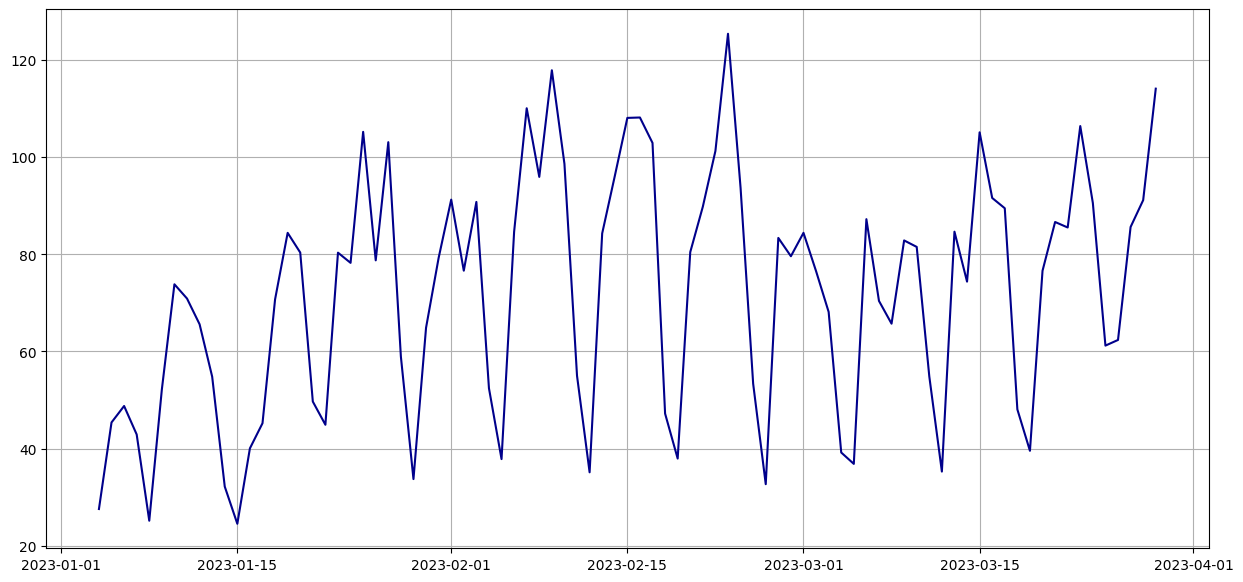

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
#  Obtener la evolucion del sentimiento para el TOPICO 3 y graficar los resultados
topic_3_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==2]
topic_3_sentiment = topic_3_sentiment[topic_3_sentiment.date.notnull()]
df_bygroup=pd.DataFrame(topic_3_sentiment.groupby(['date'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Chat_SA_dates_3.csv')
df_bygroup

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,scores,date
date,,
2023-01-04,24.5996,2023-01-04
2023-01-05,33.5523,2023-01-05
2023-01-06,52.3849,2023-01-06
2023-01-07,35.4587,2023-01-07
2023-01-08,37.8331,2023-01-08
...,...,...
2023-03-25,74.5799,2023-03-25
2023-03-26,65.6141,2023-03-26
2023-03-27,82.5692,2023-03-27


In [ ]:
# Calcular resumen de las puntuaciones
max_score = df_bygroup['scores'].max()
min_score = df_bygroup['scores'].min()
mean_score = df_bygroup['scores'].mean()
std_score = df_bygroup['scores'].std()  # Desviación estándar
skew_score = df_bygroup['scores'].skew()  # Coeficiente de asimetría

# Mostrar el resumen
print("Resumen de las puntuaciones:")
print("Puntuación Máximo:", max_score)
print("Puntuación Mínimo:", min_score)
print("Media de las puntuaciones:", mean_score)
print("Desviación Estándar de las puntuaciones:", std_score)
print("Coeficiente de Asimetría de las puntuaciones:", skew_score)

Resumen de los puntajes:
Puntaje Máximo: 131.2647
Puntaje Mínimo: 24.5996
Media de los Puntajes: 65.56816470588234
Desviación Estándar de los Puntajes: 23.645713558676498
Coeficiente de Asimetría de los Puntajes: 0.6338000537041169


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


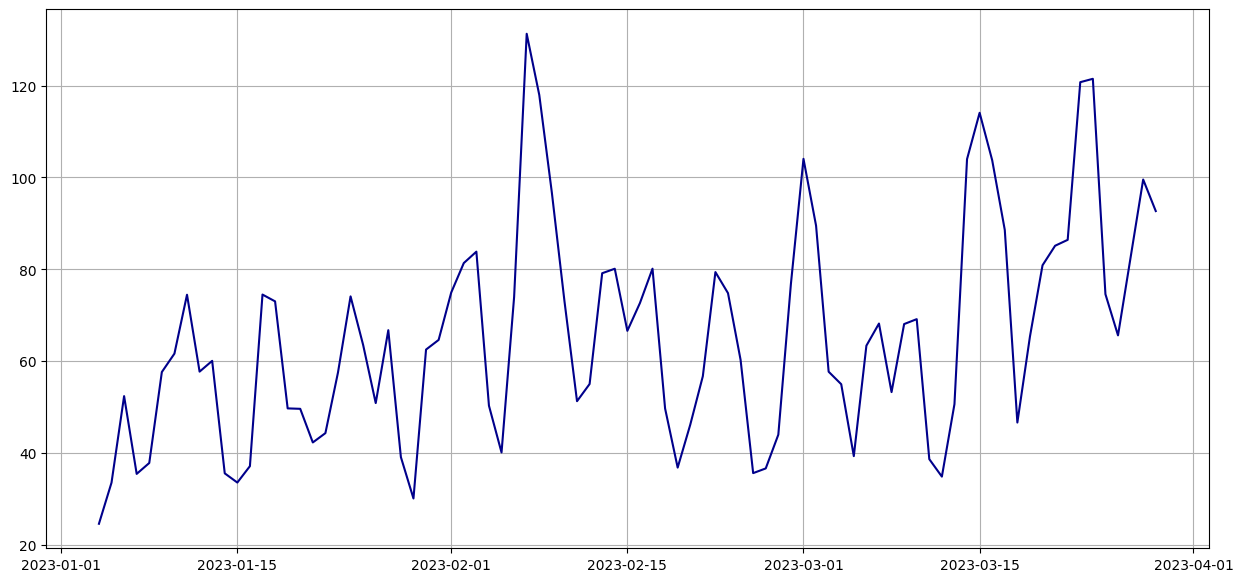

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
#  Obtener la evolucion del sentimiento para el TOPICO 4 y graficar los resultados
topic_4_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==3]
topic_4_sentiment = topic_4_sentiment[topic_4_sentiment.date.notnull()]
df_bygroup=pd.DataFrame(topic_4_sentiment.groupby(['date'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Chat_SA_dates_4.csv')
df_bygroup

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,scores,date
date,,
2023-01-04,74.3169,2023-01-04
2023-01-05,120.7417,2023-01-05
2023-01-06,100.6265,2023-01-06
2023-01-07,93.8332,2023-01-07
2023-01-08,79.0618,2023-01-08
...,...,...
2023-03-25,76.1754,2023-03-25
2023-03-26,83.6425,2023-03-26
2023-03-27,109.0555,2023-03-27


In [ ]:
# Calcular resumen de las puntuaciones
max_score = df_bygroup['scores'].max()
min_score = df_bygroup['scores'].min()
mean_score = df_bygroup['scores'].mean()
std_score = df_bygroup['scores'].std()  # Desviación estándar
skew_score = df_bygroup['scores'].skew()  # Coeficiente de asimetría

# Mostrar el resumen
print("Resumen de las puntuaciones:")
print("Puntuación Máximo:", max_score)
print("Puntuación Mínimo:", min_score)
print("Media de las puntuaciones:", mean_score)
print("Desviación Estándar de las puntuaciones:", std_score)
print("Coeficiente de Asimetría de las puntuaciones:", skew_score)

Resumen de los puntajes:
Puntaje Máximo: 168.3645
Puntaje Mínimo: 42.0163
Media de los Puntajes: 100.41056117647061
Desviación Estándar de los Puntajes: 23.014158718286843
Coeficiente de Asimetría de los Puntajes: 0.08207454541553978


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


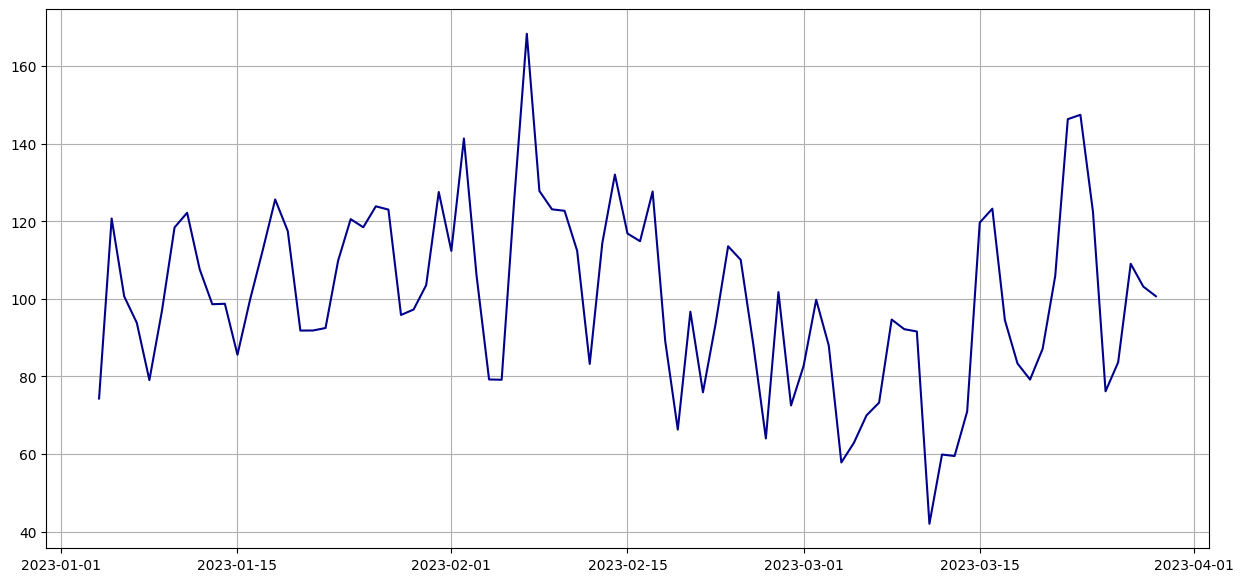

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
#  Obtener la evolucion del sentimiento para el TOPICO 5 y graficar los resultados
topic_5_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==4]
topic_5_sentiment = topic_5_sentiment[topic_5_sentiment.date.notnull()]
df_bygroup=pd.DataFrame(topic_5_sentiment.groupby(['date'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Chat_SA_dates_5.csv')
df_bygroup

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,scores,date
date,,
2023-01-04,16.4353,2023-01-04
2023-01-05,19.0528,2023-01-05
2023-01-06,10.1132,2023-01-06
2023-01-07,19.6471,2023-01-07
2023-01-08,13.4159,2023-01-08
...,...,...
2023-03-25,17.8823,2023-03-25
2023-03-26,22.9718,2023-03-26
2023-03-27,28.4657,2023-03-27


In [ ]:
# Calcular resumen de las puntuaciones
max_score = df_bygroup['scores'].max()
min_score = df_bygroup['scores'].min()
mean_score = df_bygroup['scores'].mean()
std_score = df_bygroup['scores'].std()  # Desviación estándar
skew_score = df_bygroup['scores'].skew()  # Coeficiente de asimetría

# Mostrar el resumen
print("Resumen de las puntuaciones:")
print("Puntuación Máximo:", max_score)
print("Puntuación Mínimo:", min_score)
print("Media de las puntuaciones:", mean_score)
print("Desviación Estándar de las puntuaciones:", std_score)
print("Coeficiente de Asimetría de las puntuaciones:", skew_score)

Resumen de los puntajes:
Puntaje Máximo: 40.5857
Puntaje Mínimo: 2.4368999999999996
Media de los Puntajes: 20.23618
Desviación Estándar de los Puntajes: 7.434521488265146
Coeficiente de Asimetría de los Puntajes: 0.13359901284266582


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


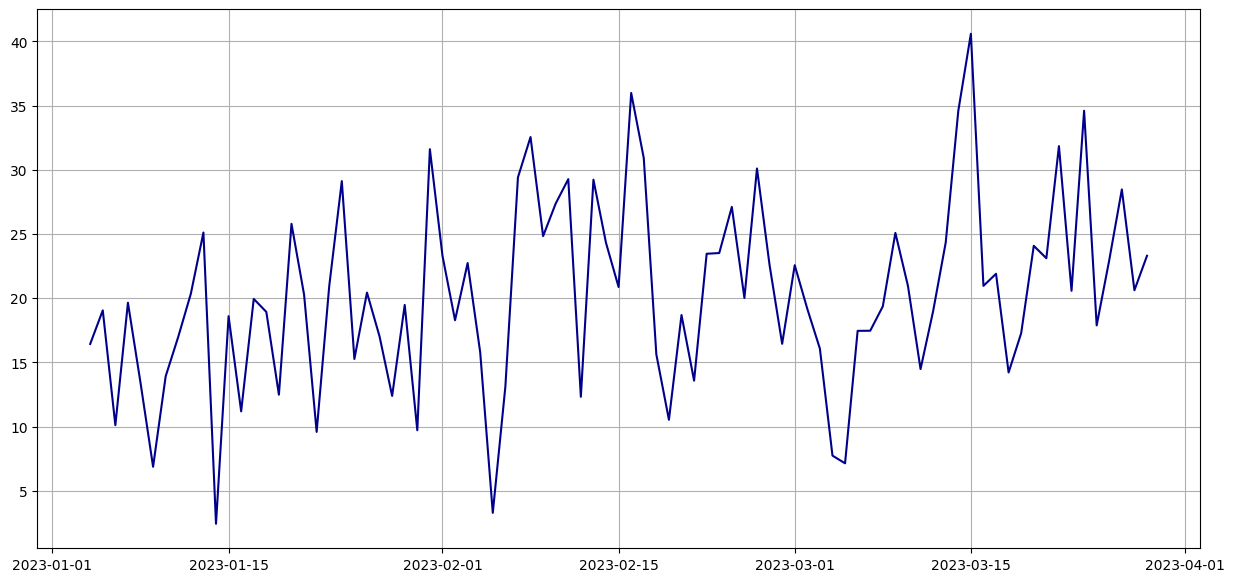

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()